In [71]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [72]:
import torch

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Number of GPU:  1
GPU Name:  NVIDIA GeForce RTX 4070 Laptop GPU
Using device: cuda


In [73]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [74]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [75]:
target = pd.read_excel(r'C:\Users\abdur\vs_code\sidra\widsdatathon2025\TRAIN\TRAINING_SOLUTIONS.xlsx')
categorical = pd.read_excel(r'C:\Users\abdur\vs_code\sidra\widsdatathon2025\TRAIN\TRAIN_CATEGORICAL_METADATA.xlsx')
function = pd.read_csv(r'C:\Users\abdur\vs_code\sidra\widsdatathon2025\TRAIN\TRAIN_FUNCTIONAL_CONNECTOME_MATRICES.csv')
quantitative = pd.read_excel(r'C:\Users\abdur\vs_code\sidra\widsdatathon2025\TRAIN\TRAIN_QUANTITATIVE_METADATA.xlsx')

target.shape, categorical.shape, function.shape,quantitative.shape
len(target['participant_id'].unique()),\
len(categorical['participant_id'].unique()),\
len(function['participant_id'].unique()),\
len(quantitative['participant_id'].unique())
#1213 subjects in total

(1213, 1213, 1213, 1213)

In [92]:
import os
import pandas as pd

def get_feats(mode='TRAIN'):
    # Define base dataset path
    base_path = r'C:\Users\abdur\vs_code\sidra\widsdatathon2025'
    mode_path = os.path.join(base_path, mode)
    
    # Load quantitative metadata
    feats = pd.read_excel(os.path.join(mode_path, f'{mode}_QUANTITATIVE_METADATA.xlsx'), engine='openpyxl')
    
    # Load categorical metadata with correct filename depending on mode
    if mode == 'TRAIN':
        cate_path = os.path.join(mode_path, f'{mode}_CATEGORICAL_METADATA.xlsx')
    else:
        cate_path = os.path.join(mode_path, f'{mode}_CATEGORICAL.xlsx')
    
    cate = pd.read_excel(cate_path, engine='openpyxl')
    
    # Merge categorical data
    feats = feats.merge(cate, on='participant_id', how='left')
    
    # Load functional connectome matrices
    func = pd.read_csv(os.path.join(mode_path, f'{mode}_FUNCTIONAL_CONNECTOME_MATRICES.csv'))
    feats = feats.merge(func, on='participant_id', how='left')
    
    # If training data, merge with solution file
    if mode == 'TRAIN':
        solution_path = os.path.join(mode_path, 'TRAINING_SOLUTIONS.xlsx')
        solution = pd.read_excel(solution_path, engine='openpyxl')
        feats = feats.merge(solution, on='participant_id', how='left')
    
    return feats

# Load the combined dataset for training
df_train = get_feats('TRAIN')
print("Final dataset shape:", df_train.shape)

Final dataset shape: (1213, 19930)


In [93]:
train_df = get_feats(mode='TRAIN')
test_df = get_feats(mode='TEST')
print (train_df.shape, test_df.shape)
# Display the first few rows of the training data
train_df.head()

(1213, 19930) (304, 19928)


,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn,ADHD_Outcome,Sex_F
0,UmrK0vMLopoR,40.00,13,3,10,47,13,11,28,0,...,-0.058396,-0.041544,0.142806,-0.006377,0.108005,0.148327,0.093230,-0.004984,1,1
1,CPaeQkhcjg7d,-94.47,14,3,13,34,18,23,30,0,...,-0.025624,-0.031863,0.162011,0.067439,0.017155,0.088893,0.064094,0.194381,1,0
2,Nb4EetVPm3gs,-46.67,14,4,10,35,16,10,29,1,...,0.010771,-0.044341,0.128386,0.047282,0.087678,0.146221,-0.009425,0.035150,1,0
3,p4vPhVu91o4b,-26.68,10,5,12,39,19,16,28,6,...,-0.007152,0.032584,0.121726,0.045089,0.154464,0.106817,0.065336,0.234708,1,1
4,M09PXs7arQ5E,0.00,14,5,15,40,20,24,28,1,...,-0.010196,0.035638,0.074978,0.030579,0.025640,0.118199,0.112522,0.143666,1,1


In [94]:
test_df.head()

,participant_id,EHQ_EHQ_Total,ColorVision_CV_Score,APQ_P_APQ_P_CP,APQ_P_APQ_P_ID,APQ_P_APQ_P_INV,APQ_P_APQ_P_OPD,APQ_P_APQ_P_PM,APQ_P_APQ_P_PP,SDQ_SDQ_Conduct_Problems,...,195throw_196thcolumn,195throw_197thcolumn,195throw_198thcolumn,195throw_199thcolumn,196throw_197thcolumn,196throw_198thcolumn,196throw_199thcolumn,197throw_198thcolumn,197throw_199thcolumn,198throw_199thcolumn
0,Cfwaf5FX7jWK,60.03,14.0,5.0,16.0,41.0,19.0,11.0,26.0,2.0,...,0.080423,-0.054581,-0.088163,-0.028574,0.444847,0.350149,-0.012601,0.665750,0.560565,0.555732
1,vhGrzmvA3Hjq,86.71,12.0,3.0,13.0,43.0,18.0,15.0,28.0,2.0,...,0.198009,-0.000724,0.083122,0.033043,0.687497,0.306229,0.717485,0.461809,0.559632,0.350027
2,ULliyEXjy4OV,26.68,13.0,3.0,14.0,36.0,16.0,14.0,25.0,1.0,...,0.051319,0.023630,-0.056819,0.117396,0.576086,0.517831,0.527044,0.605038,0.609856,0.750987
3,LZfeAb1xMtql,93.38,13.0,3.0,19.0,41.0,17.0,18.0,27.0,4.0,...,0.046183,-0.238962,0.121868,-0.260970,0.646818,0.594902,0.608156,0.595459,0.683189,0.542296
4,EnFOUv0YK1RG,-93.38,14.0,3.0,13.0,42.0,19.0,16.0,28.0,2.0,...,0.315734,0.002234,0.290791,0.344149,0.480214,0.539824,0.447322,0.293088,0.148529,0.539823


In [95]:
# Drop 'participant_id' column
train_df = train_df.drop(columns=['participant_id'])

In [96]:
# Check the shape of the dataset
print("Dataset Shape:", train_df.shape)

# Get data types of all columns
print("Data types of columns:")
print(train_df.dtypes)


Dataset Shape: (1213, 19929)
Data types of columns:
EHQ_EHQ_Total           float64
ColorVision_CV_Score      int64
APQ_P_APQ_P_CP            int64
APQ_P_APQ_P_ID            int64
APQ_P_APQ_P_INV           int64
                         ...   
197throw_198thcolumn    float64
197throw_199thcolumn    float64
198throw_199thcolumn    float64
ADHD_Outcome              int64
Sex_F                     int64
Length: 19929, dtype: object


In [ ]:
# Take the first 50 rows of train_df
train_df_50 = train_df

In [98]:
# Check for missing values
print("Missing values in each column:")
print(train_df_50.isnull().sum())


Missing values in each column:
EHQ_EHQ_Total           0
ColorVision_CV_Score    0
APQ_P_APQ_P_CP          0
APQ_P_APQ_P_ID          0
APQ_P_APQ_P_INV         0
                       ..
197throw_198thcolumn    0
197throw_199thcolumn    0
198throw_199thcolumn    0
ADHD_Outcome            0
Sex_F                   0
Length: 19929, dtype: int64


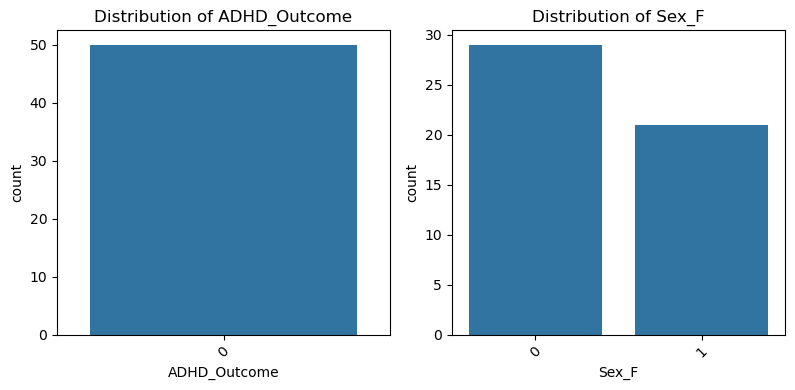

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

# Load Data (Ensure train_df_50 is already loaded before running this code)
# Extract labels if they are part of train_df_50
if 'labels' not in globals():
    labels = train_df_50[["ADHD_Outcome", "Sex_F"]].copy()  # Extract labels from train_df_50

# 1. Drop columns
drop_cols = [
    "Basic_Demos_Study_Site", "MRI_Track_Scan_Location", "PreInt_Demos_Fam_Child_Ethnicity",
    "PreInt_Demos_Fam_Child_Race", 'Barratt_Barratt_P1_Occ', 'Barratt_Barratt_P2_Occ'
]
train_df_50 = train_df_50.drop(columns=drop_cols, errors='ignore')  # Avoid errors if column missing

# 2. Remove non-numeric columns before scaling
numeric_cols = train_df_50.select_dtypes(include=[np.number]).columns  # Keep only numeric columns
train_df_50 = train_df_50[numeric_cols]  # Drop categorical or object columns

# 3. Normalize features using MinMaxScaler
scaler = MinMaxScaler()
train_df_50.iloc[:, :] = scaler.fit_transform(train_df_50)


# 5. Retrieve target variables
y_adhd = labels["ADHD_Outcome"].copy()
y_sex = labels["Sex_F"].copy()

# 6. Plot Count Plots for Categorical Variables
categorical_cols = ["ADHD_Outcome", "Sex_F"]  # Update with actual categorical column names
num_cats = len(categorical_cols)
rows = (num_cats // 3) + (num_cats % 3 > 0)  # Calculate dynamic rows

plt.figure(figsize=(12, rows * 4))  # Adjust figure size dynamically

for idx, col in enumerate(categorical_cols, 1):  # Start index at 1 for subplot
    plt.subplot(rows, 3, idx)  # Dynamic rows and fixed 3 columns
    sns.countplot(data=labels, x=col)  # Use labels since train_df_50 no longer has categorical columns
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)  # Rotate labels for better readability

plt.tight_layout()
plt.show()


In [100]:
print(train_df_50["ADHD_Outcome"].unique())
print(train_df_50["Sex_F"].unique())

[1 0]
[1 0]



X shape: (1213, 19922)
y shape: (1213,)


X_numeric shape: (1213, 19922)
y_numeric shape: (1213,)

Top 15 features based on correlation:
                     Feature  Correlation_Score
19315   164throw_189thcolumn           0.184340
19299   164throw_173thcolumn           0.156365
13     SDQ_SDQ_Hyperactivity           0.142179
19092   158throw_191thcolumn           0.138679
5374     28throw_188thcolumn           0.131621
17641   131throw_198thcolumn           0.131566
19921           ADHD_Outcome           0.130836
17758   133throw_182thcolumn           0.130450
19790   183throw_189thcolumn           0.130260
16272   114throw_121thcolumn           0.129459
19558   172throw_188thcolumn           0.126670
19732   180throw_182thcolumn           0.123855
11666     71throw_73thcolumn           0.123207
19170   160throw_190thcolumn           0.122821
19798   183throw_197thcolumn           0.122806

Top 15 features based on variance:
                          Feature  Variance_Score
19921                ADHD_Outcome        0.215924
2

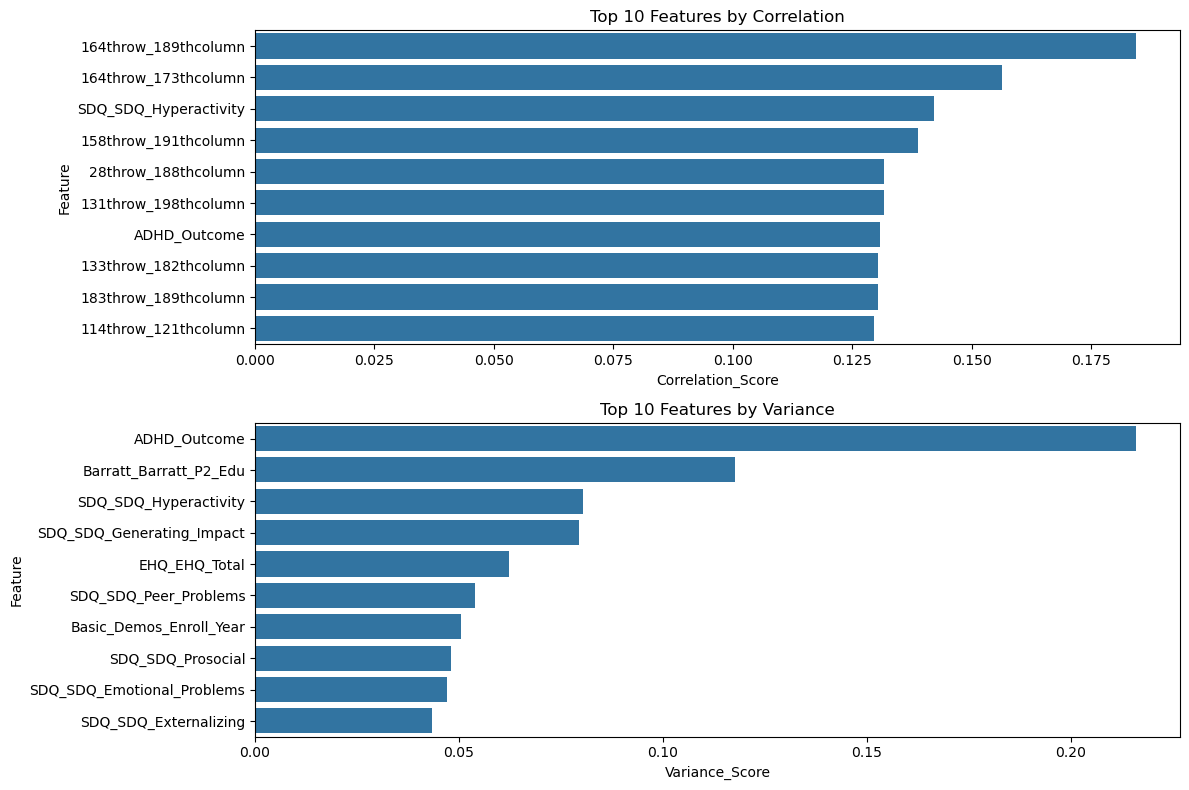

In [101]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

X = train_df_50.iloc[:, :-1]  # All columns except the last one
y = train_df_50.iloc[:, -1]   # Just the last column

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")

# Convert to numeric if needed (safely)
# This handles any potential non-numeric data
X_numeric = X.apply(pd.to_numeric, errors='coerce')
y_numeric = pd.to_numeric(y, errors='coerce')

# Fill any NaN values created during conversion
X_numeric = X_numeric.fillna(X_numeric.mean())
y_numeric = y_numeric.fillna(y_numeric.mean())

print(f"X_numeric shape: {X_numeric.shape}")
print(f"y_numeric shape: {y_numeric.shape}")

# Method 1: Feature Selection using absolute correlation
# Manually calculate correlation to avoid any issues
corr_scores = {}
for col in X_numeric.columns:
    # Safe correlation calculation
    try:
        # Calculate Pearson correlation safely
        correlation = X_numeric[col].corr(y_numeric)
        if np.isnan(correlation):
            correlation = 0
        corr_scores[col] = abs(correlation)
    except Exception as e:
        print(f"Error calculating correlation for column {col}: {e}")
        corr_scores[col] = 0

corr_df = pd.DataFrame({
    'Feature': list(corr_scores.keys()),
    'Correlation_Score': list(corr_scores.values())
}).sort_values('Correlation_Score', ascending=False)

print("\nTop 15 features based on correlation:")
print(corr_df.head(15))

# Get the selected feature names
corr_selected_features = corr_df.head(15)['Feature'].tolist()

# Method 2: Feature Selection using Variance
# This approach selects features with the highest variance
var_scores = {}
for col in X_numeric.columns:
    try:
        var_scores[col] = X_numeric[col].var()
        if np.isnan(var_scores[col]):
            var_scores[col] = 0
    except Exception as e:
        print(f"Error calculating variance for column {col}: {e}")
        var_scores[col] = 0

var_df = pd.DataFrame({
    'Feature': list(var_scores.keys()),
    'Variance_Score': list(var_scores.values())
}).sort_values('Variance_Score', ascending=False)

print("\nTop 15 features based on variance:")
print(var_df.head(15))

# Get the selected feature names
var_selected_features = var_df.head(15)['Feature'].tolist()

# Find common features between both methods
common_features = list(set(corr_selected_features).intersection(set(var_selected_features)))
print(f"\nCommon important features from both methods: {len(common_features)}")
print(common_features)

# If no common features are found, use top features from correlation method
if not common_features:
    print("No common features found. Using top 10 features from correlation method.")
    common_features = corr_selected_features[:10]

# Create a new dataframe with only the common features and the target
target_name = train_df_50.columns[-1]  # Get the name of the target column
selected_columns = common_features + [target_name]
new_df = train_df_50[selected_columns]

# Save the new dataframe to CSV
new_df.to_csv('selected_features.csv', index=False)
print(f"\nNew CSV file 'selected_features.csv' created with shape: {new_df.shape}")

# Read the CSV back to confirm
read_df = pd.read_csv('selected_features.csv')
print("\nHead of the new CSV file:")
print(read_df.head())

# Visualize the feature importance
plt.figure(figsize=(12, 8))

# Bar plot for Correlation scores
plt.subplot(2, 1, 1)
sns.barplot(x='Correlation_Score', y='Feature', data=corr_df.head(10))
plt.title('Top 10 Features by Correlation')
plt.tight_layout()

# Bar plot for Variance scores
plt.subplot(2, 1, 2)
sns.barplot(x='Variance_Score', y='Feature', data=var_df.head(10))
plt.title('Top 10 Features by Variance')
plt.tight_layout()

plt.savefig('feature_importance.png')
print("\nFeature importance plot saved as 'feature_importance.png'")

# Highlight the common features
print("\nCommon important features with their scores:")
common_corr_scores = corr_df[corr_df['Feature'].isin(common_features)]
common_var_scores = var_df[var_df['Feature'].isin(common_features)]

result = pd.merge(common_corr_scores, common_var_scores, on='Feature')
print(result.sort_values('Correlation_Score', ascending=False))

DataFrame shape: (1213, 19923)

First 5 rows of the dataset:
   EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  APQ_P_APQ_P_ID  \
0        0.70000              0.928571        0.250000        0.357143   
1        0.02765              1.000000        0.250000        0.464286   
2        0.26665              1.000000        0.333333        0.357143   
3        0.36660              0.714286        0.416667        0.428571   
4        0.50000              1.000000        0.416667        0.535714   

   APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  APQ_P_APQ_P_PP  \
0             0.94         0.464286        0.297297        0.933333   
1             0.68         0.642857        0.621622        1.000000   
2             0.70         0.571429        0.270270        0.966667   
3             0.78         0.678571        0.432432        0.933333   
4             0.80         0.714286        0.648649        0.933333   

   SDQ_SDQ_Conduct_Problems  SDQ_SDQ_Difficulties_Total  ...  \
0  

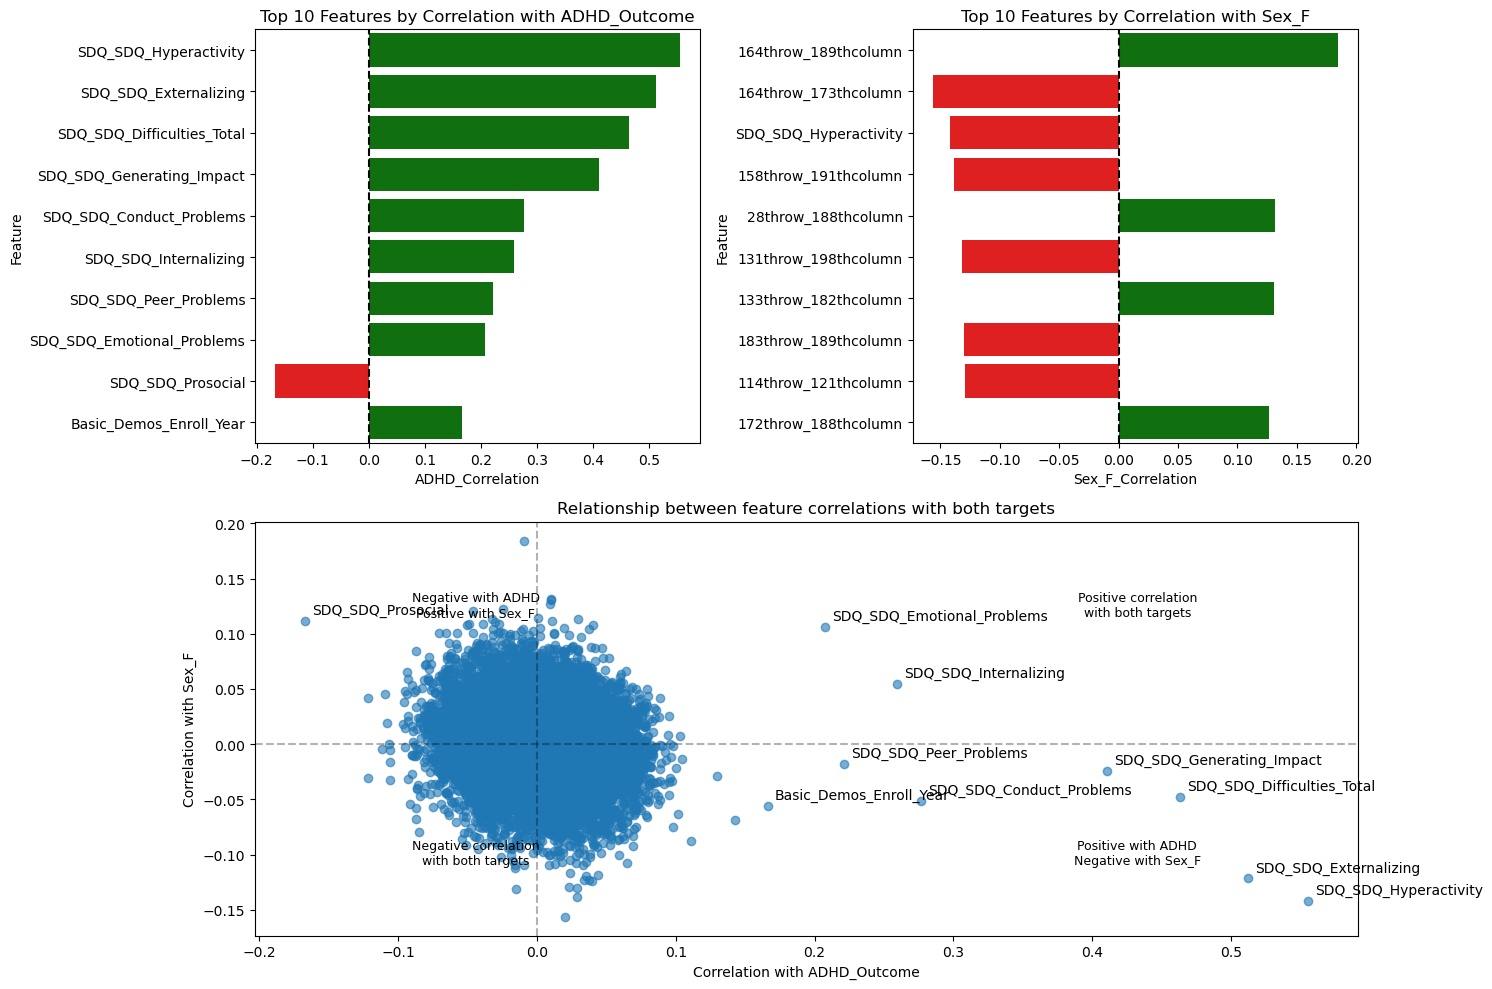

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pointbiserialr

# Load the dataframe
# If you have already loaded train_df_50, you can skip this line
# train_df_50 = pd.read_csv('train_df_50.csv')

# Understanding the dataset
print(f"DataFrame shape: {train_df_50.shape}")
print("\nFirst 5 rows of the dataset:")
print(train_df_50.head())

# Check data types and missing values
print("\nData types in the DataFrame:")
print(train_df_50.dtypes)
print(f"\nMissing values in DataFrame: {train_df_50.isna().sum().sum()}")

# Assuming ADHD_Outcome and Sex_F are the target variables
target_columns = ["ADHD_Outcome", "Sex_F"]

# Verify that both target columns exist
for col in target_columns:
    if col in train_df_50.columns:
        print(f"\nTarget variable '{col}' found")
    else:
        print(f"\nWARNING: Target variable '{col}' not found!")

# Features are all columns except the target columns
feature_columns = [col for col in train_df_50.columns if col not in target_columns]
X = train_df_50[feature_columns]

# Convert features to numeric if needed
X_numeric = X.apply(pd.to_numeric, errors='coerce')
X_numeric = X_numeric.fillna(X_numeric.mean())

# Part 1: Correlation Analysis for ADHD_Outcome
if "ADHD_Outcome" in train_df_50.columns:
    adhd_target = train_df_50["ADHD_Outcome"]
    adhd_correlations = {}
    
    # Calculate point-biserial correlation if ADHD_Outcome is binary
    # or Pearson correlation if it's continuous
    is_binary = len(adhd_target.unique()) <= 2
    
    for col in X_numeric.columns:
        try:
            if is_binary:
                # Point-biserial correlation for binary target
                correlation, _ = pointbiserialr(adhd_target, X_numeric[col])
            else:
                # Pearson correlation for continuous target
                correlation = X_numeric[col].corr(adhd_target)
                
            if np.isnan(correlation):
                correlation = 0
            adhd_correlations[col] = correlation
        except Exception as e:
            print(f"Error calculating correlation for column {col} with ADHD_Outcome: {e}")
            adhd_correlations[col] = 0
    
    # Convert to DataFrame
    adhd_corr_df = pd.DataFrame({
        'Feature': list(adhd_correlations.keys()),
        'ADHD_Correlation': list(adhd_correlations.values())
    })
    adhd_corr_df['Abs_ADHD_Correlation'] = adhd_corr_df['ADHD_Correlation'].abs()
    adhd_corr_df = adhd_corr_df.sort_values('Abs_ADHD_Correlation', ascending=False)
    
    print("\nTop 15 features correlated with ADHD_Outcome:")
    print(adhd_corr_df.head(15))
    
    # Find features with positive and negative correlations
    positive_adhd_corr = adhd_corr_df[adhd_corr_df['ADHD_Correlation'] > 0].sort_values('ADHD_Correlation', ascending=False)
    negative_adhd_corr = adhd_corr_df[adhd_corr_df['ADHD_Correlation'] < 0].sort_values('ADHD_Correlation')
    
    print("\nTop 10 features positively correlated with ADHD_Outcome:")
    print(positive_adhd_corr.head(10))
    
    print("\nTop 10 features negatively correlated with ADHD_Outcome:")
    print(negative_adhd_corr.head(10))

# Part 2: Correlation Analysis for Sex_F
if "Sex_F" in train_df_50.columns:
    sex_target = train_df_50["Sex_F"]
    sex_correlations = {}
    
    # Calculate point-biserial correlation if Sex_F is binary
    # or Pearson correlation if it's continuous
    is_binary = len(sex_target.unique()) <= 2
    
    for col in X_numeric.columns:
        try:
            if is_binary:
                # Point-biserial correlation for binary target
                correlation, _ = pointbiserialr(sex_target, X_numeric[col])
            else:
                # Pearson correlation for continuous target
                correlation = X_numeric[col].corr(sex_target)
                
            if np.isnan(correlation):
                correlation = 0
            sex_correlations[col] = correlation
        except Exception as e:
            print(f"Error calculating correlation for column {col} with Sex_F: {e}")
            sex_correlations[col] = 0
    
    # Convert to DataFrame
    sex_corr_df = pd.DataFrame({
        'Feature': list(sex_correlations.keys()),
        'Sex_F_Correlation': list(sex_correlations.values())
    })
    sex_corr_df['Abs_Sex_F_Correlation'] = sex_corr_df['Sex_F_Correlation'].abs()
    sex_corr_df = sex_corr_df.sort_values('Abs_Sex_F_Correlation', ascending=False)
    
    print("\nTop 15 features correlated with Sex_F:")
    print(sex_corr_df.head(15))
    
    # Find features with positive and negative correlations
    positive_sex_corr = sex_corr_df[sex_corr_df['Sex_F_Correlation'] > 0].sort_values('Sex_F_Correlation', ascending=False)
    negative_sex_corr = sex_corr_df[sex_corr_df['Sex_F_Correlation'] < 0].sort_values('Sex_F_Correlation')
    
    print("\nTop 10 features positively correlated with Sex_F:")
    print(positive_sex_corr.head(10))
    
    print("\nTop 10 features negatively correlated with Sex_F:")
    print(negative_sex_corr.head(10))

# Part 3: Combined Analysis - Find features important for both targets
if "ADHD_Outcome" in train_df_50.columns and "Sex_F" in train_df_50.columns:
    # Merge the correlation results
    combined_corr = pd.merge(adhd_corr_df, sex_corr_df, on='Feature')
    
    # Calculate average absolute correlation
    combined_corr['Avg_Abs_Correlation'] = (combined_corr['Abs_ADHD_Correlation'] + combined_corr['Abs_Sex_F_Correlation']) / 2
    combined_corr = combined_corr.sort_values('Avg_Abs_Correlation', ascending=False)
    
    print("\nTop 15 features important for both ADHD_Outcome and Sex_F:")
    print(combined_corr.head(15))
    
    # Find top 10 features for both targets
    top_adhd_features = set(adhd_corr_df.head(15)['Feature'])
    top_sex_features = set(sex_corr_df.head(15)['Feature'])
    common_features = top_adhd_features.intersection(top_sex_features)
    
    print("\nFeatures appearing in top 15 for both targets:")
    print(list(common_features))

# Part 4: Visualization
plt.figure(figsize=(15, 10))

# Plot 1: Top features for ADHD_Outcome
if "ADHD_Outcome" in train_df_50.columns:
    plt.subplot(2, 2, 1)
    colors = ['red' if x < 0 else 'green' for x in adhd_corr_df.head(10)['ADHD_Correlation']]
    sns.barplot(x='ADHD_Correlation', y='Feature', data=adhd_corr_df.head(10), palette=colors)
    plt.title('Top 10 Features by Correlation with ADHD_Outcome')
    plt.axvline(x=0, color='k', linestyle='--')

# Plot 2: Top features for Sex_F
if "Sex_F" in train_df_50.columns:
    plt.subplot(2, 2, 2)
    colors = ['red' if x < 0 else 'green' for x in sex_corr_df.head(10)['Sex_F_Correlation']]
    sns.barplot(x='Sex_F_Correlation', y='Feature', data=sex_corr_df.head(10), palette=colors)
    plt.title('Top 10 Features by Correlation with Sex_F')
    plt.axvline(x=0, color='k', linestyle='--')

# Plot 3: Scatter plot of correlations for both targets
if "ADHD_Outcome" in train_df_50.columns and "Sex_F" in train_df_50.columns:
    plt.subplot(2, 1, 2)
    plt.scatter(combined_corr['ADHD_Correlation'], combined_corr['Sex_F_Correlation'], alpha=0.6)
    
    # Add feature names for top points
    for i, row in combined_corr.head(10).iterrows():
        plt.annotate(row['Feature'], 
                    (row['ADHD_Correlation'], row['Sex_F_Correlation']),
                    xytext=(5, 5), textcoords='offset points')
    
    plt.xlabel('Correlation with ADHD_Outcome')
    plt.ylabel('Correlation with Sex_F')
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='--', alpha=0.3)
    plt.title('Relationship between feature correlations with both targets')
    
    # Add quadrant labels
    plt.text(0.8, 0.8, 'Positive correlation\nwith both targets', 
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, fontsize=9)
    plt.text(0.2, 0.8, 'Negative with ADHD\nPositive with Sex_F', 
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, fontsize=9)
    plt.text(0.8, 0.2, 'Positive with ADHD\nNegative with Sex_F', 
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, fontsize=9)
    plt.text(0.2, 0.2, 'Negative correlation\nwith both targets', 
             horizontalalignment='center', verticalalignment='center',
             transform=plt.gca().transAxes, fontsize=9)

plt.tight_layout()
plt.savefig('dual_target_correlation_analysis.png')
print("\nDual target correlation analysis visualizations saved as 'dual_target_correlation_analysis.png'")

# Part 5: Feature Selection based on both targets
if "ADHD_Outcome" in train_df_50.columns and "Sex_F" in train_df_50.columns:
    # Choose top features based on average absolute correlation
    selected_features = combined_corr.head(15)['Feature'].tolist()
    
    # Create and save the new dataset with selected features and both targets
    selected_columns = selected_features + target_columns
    new_df = train_df_50[selected_columns]
    
    new_df.to_csv('selected_features_dual_target.csv', index=False)
    print(f"\nNew CSV file 'selected_features_dual_target.csv' created with shape: {new_df.shape}")
    
    # Read the CSV back to confirm
    read_df = pd.read_csv('selected_features_dual_target.csv')
    print("\nHead of the new CSV file:")
    print(read_df.head())

Using the filtered features dataset.
Dataset shape: (1213, 17)

Target 'ADHD_Outcome' distribution: [382 831]

Evaluating models for predicting ADHD_Outcome
Training set size: 909, Test set size: 304
Class distribution in training set: [286 623]
Class distribution in test set: [ 96 208]

Evaluating Logistic Regression...

Evaluating Random Forest...

Evaluating Gradient Boosting...

Evaluating SVM...


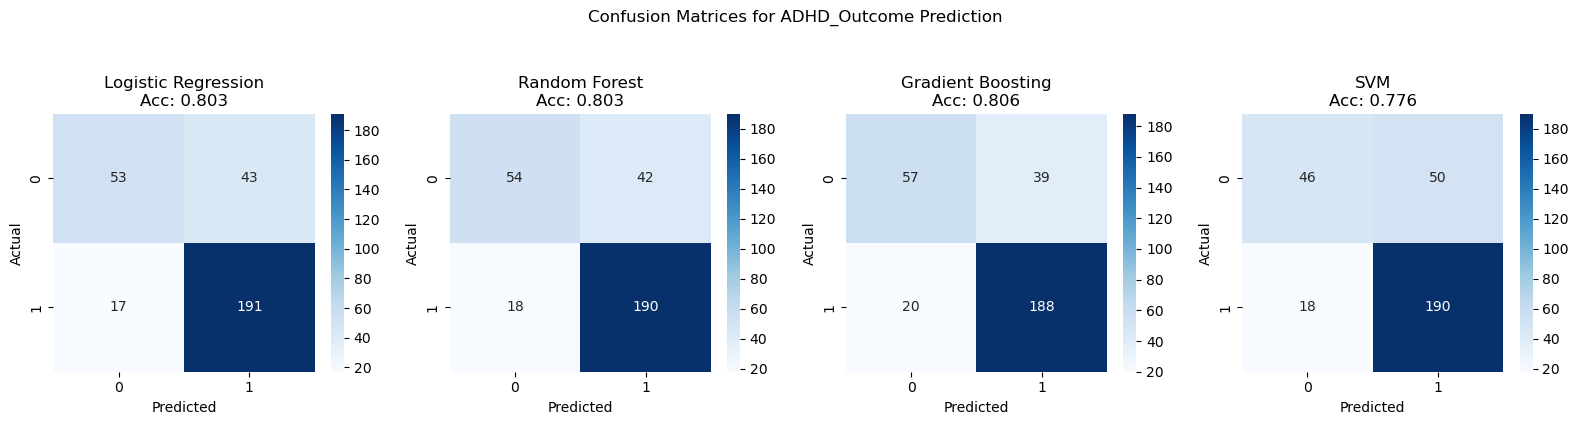

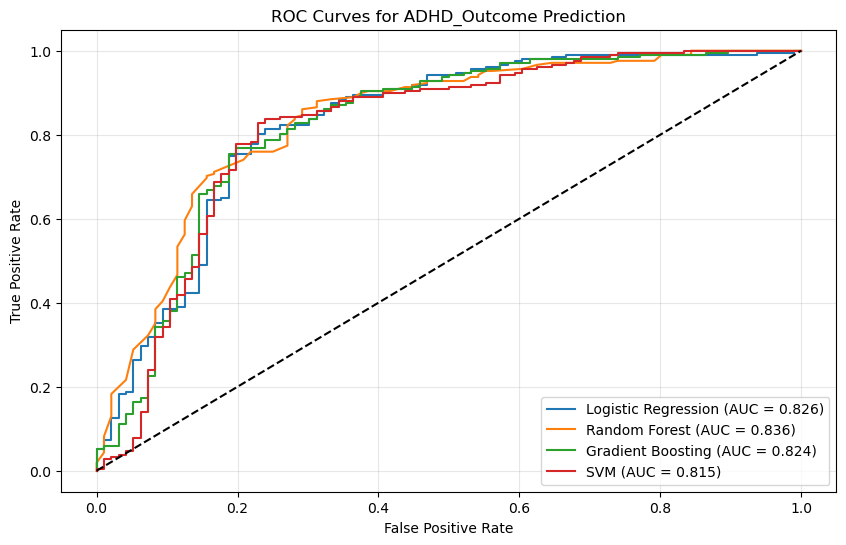

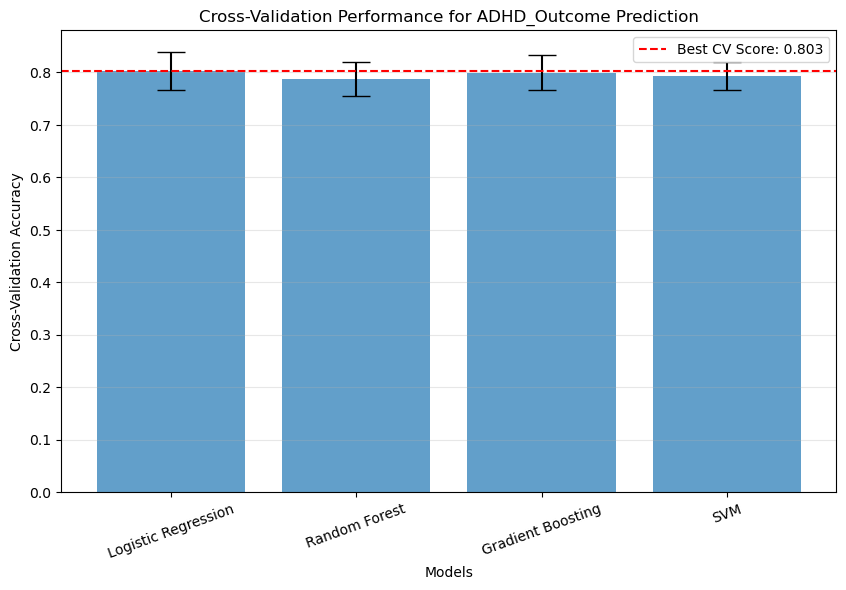

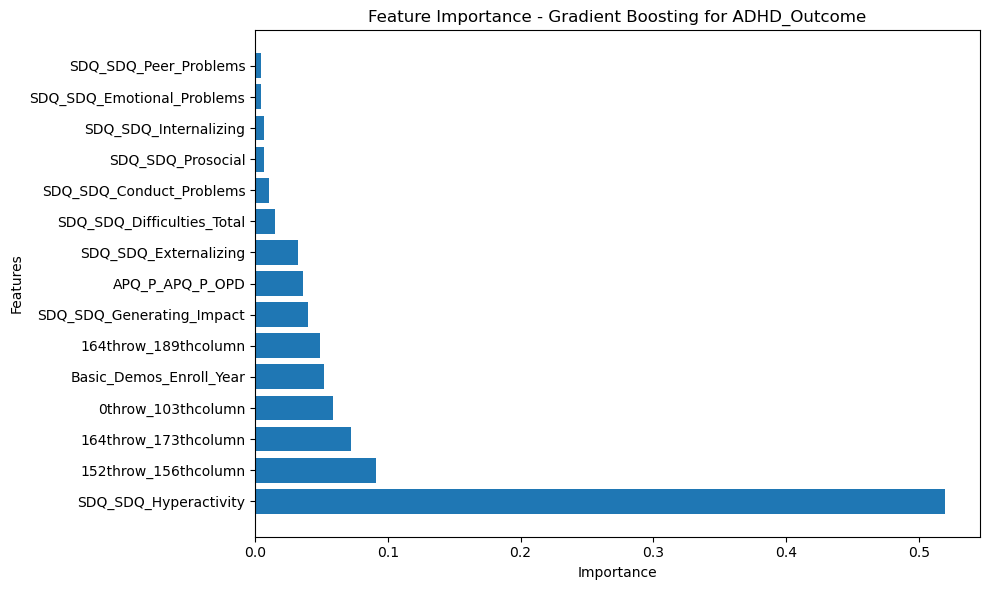


Best model for ADHD_Outcome: Gradient Boosting with accuracy 0.8059

Classification Report for the best model:
Precision - Class 0: 0.7403, Class 1: 0.8282
Recall    - Class 0: 0.5938, Class 1: 0.9038
F1-score  - Class 0: 0.6590, Class 1: 0.8644
Support   - Class 0: 96.0, Class 1: 208.0

Target 'Sex_F' distribution: [797 416]

Evaluating models for predicting Sex_F
Training set size: 909, Test set size: 304
Class distribution in training set: [597 312]
Class distribution in test set: [200 104]

Evaluating Logistic Regression...

Evaluating Random Forest...

Evaluating Gradient Boosting...

Evaluating SVM...


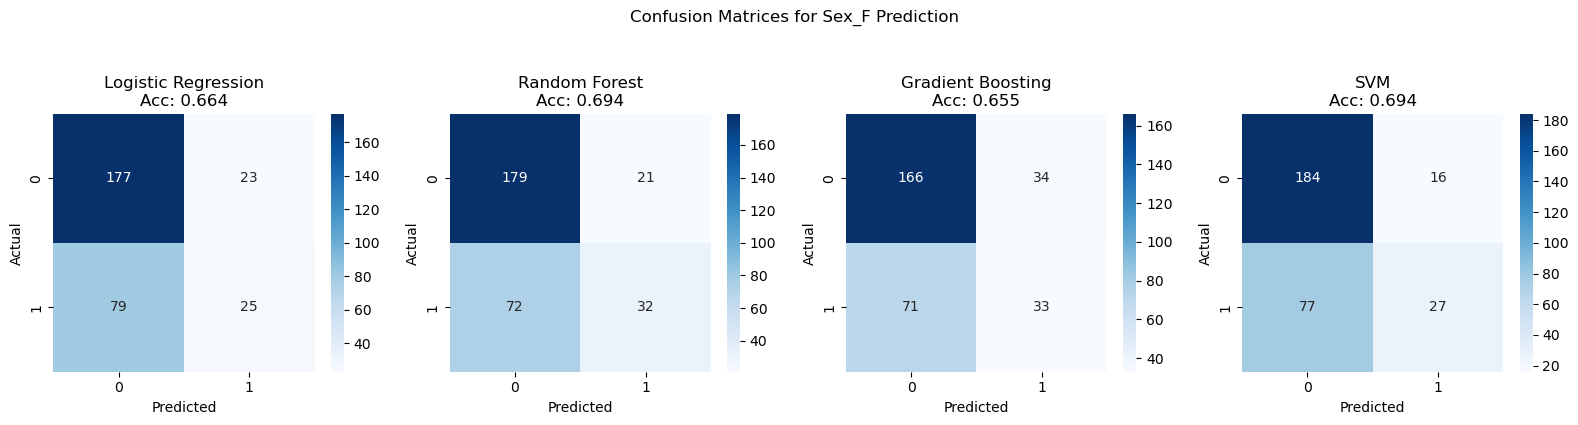

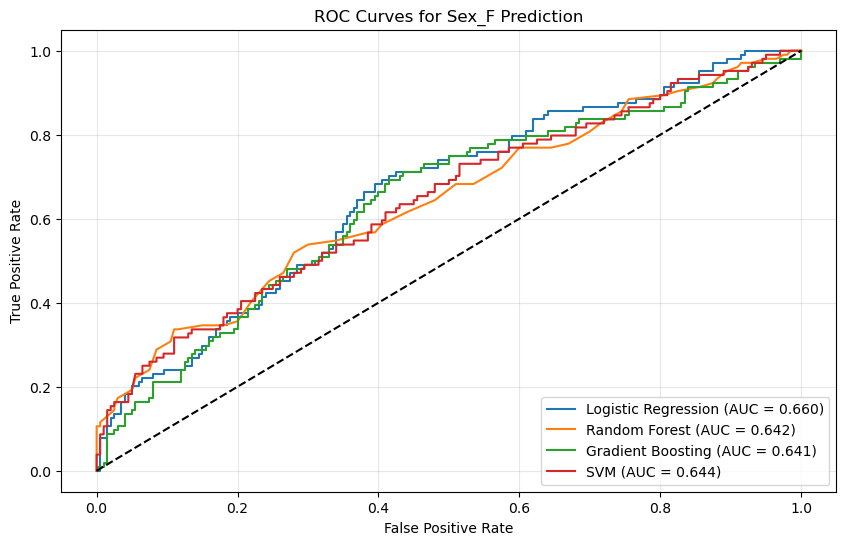

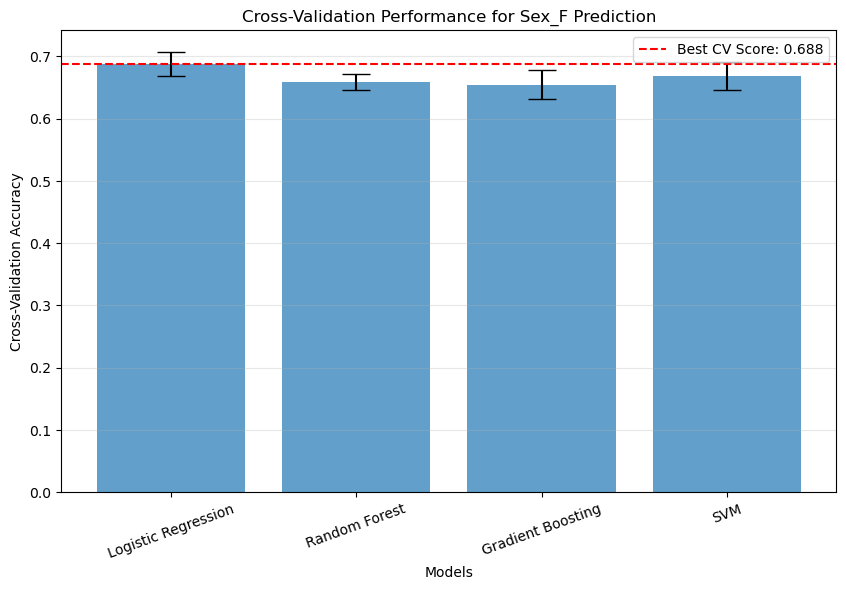

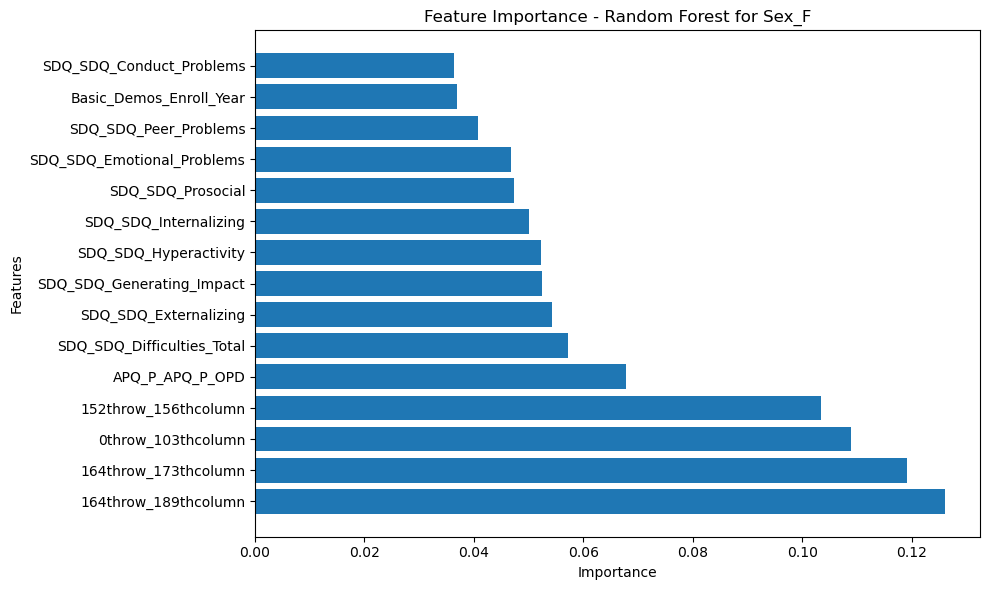


Best model for Sex_F: Random Forest with accuracy 0.6941

Classification Report for the best model:
Precision - Class 0: 0.7131, Class 1: 0.6038
Recall    - Class 0: 0.8950, Class 1: 0.3077
F1-score  - Class 0: 0.7938, Class 1: 0.4076
Support   - Class 0: 200.0, Class 1: 104.0

FINAL MODEL RECOMMENDATIONS:

For ADHD_Outcome:
  Recommended model: Gradient Boosting
  Test accuracy: 0.8059
  CV accuracy: 0.7998

  Performance of all models:
    Logistic Regression: Test acc = 0.8026, CV acc = 0.8031
    Random Forest: Test acc = 0.8026, CV acc = 0.7877
    Gradient Boosting: Test acc = 0.8059, CV acc = 0.7998
    SVM: Test acc = 0.7763, CV acc = 0.7932

For Sex_F:
  Recommended model: Random Forest
  Test accuracy: 0.6941
  CV accuracy: 0.6590

  Performance of all models:
    Logistic Regression: Test acc = 0.6645, CV acc = 0.6876
    Random Forest: Test acc = 0.6941, CV acc = 0.6590
    Gradient Boosting: Test acc = 0.6546, CV acc = 0.6545
    SVM: Test acc = 0.6941, CV acc = 0.6678

O

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Function to evaluate models and collect results without saving images
def evaluate_models(X, y, target_name, random_state=42):
    """
    Train and evaluate multiple models for comparison
    """
    print(f"\n{'='*50}")
    print(f"Evaluating models for predicting {target_name}")
    print(f"{'='*50}")
    
    # Define models to evaluate
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=random_state),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=random_state),
        'Gradient Boosting': GradientBoostingClassifier(random_state=random_state),
        'SVM': SVC(probability=True, random_state=random_state)
    }
    
    # Split data into training and testing sets using stratification
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=random_state, stratify=y
    )
    
    print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")
    print(f"Class distribution in training set: {np.bincount(y_train)}")
    print(f"Class distribution in test set: {np.bincount(y_test)}")
    
    # Standard scaler for preprocessing
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Prepare collections for results
    results = {}
    confusion_matrices = {}
    roc_data = {}
    accuracy_scores = {}
    cv_scores = {}
    feature_importance_data = {}
    
    # Create stratified k-fold for cross-validation
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)
    
    # Evaluate each model
    for model_name, model in models.items():
        print(f"\nEvaluating {model_name}...")
        
        # Cross-validation on training set
        scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='accuracy')
        cv_scores[model_name] = scores
        
        # Train on full training set
        model.fit(X_train_scaled, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test_scaled)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[model_name] = accuracy
        
        # Store classification report
        report = classification_report(y_test, y_pred, output_dict=True)
        results[model_name] = report
        
        # Store confusion matrix
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices[model_name] = cm
        
        # Get ROC curve data if available
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test_scaled)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            auc = roc_auc_score(y_test, y_prob)
            roc_data[model_name] = (fpr, tpr, auc)
        
        # Extract feature importance if available
        if hasattr(model, 'feature_importances_'):
            feature_importance_data[model_name] = {
                'type': 'importance',
                'values': model.feature_importances_
            }
        elif hasattr(model, 'coef_'):
            feature_importance_data[model_name] = {
                'type': 'coefficients',
                'values': model.coef_[0]
            }
    
    # Create comparison plots
    # 1. Confusion Matrices (side by side)
    plt.figure(figsize=(16, 4))
    plt.suptitle(f'Confusion Matrices for {target_name} Prediction', y=1.05)
    
    for i, (model_name, cm) in enumerate(confusion_matrices.items()):
        plt.subplot(1, 4, i+1)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['0', '1'], yticklabels=['0', '1'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'{model_name}\nAcc: {accuracy_scores[model_name]:.3f}')
    
    plt.tight_layout()
    plt.show()
    
    # 2. ROC Curves (all in one plot)
    plt.figure(figsize=(10, 6))
    
    for model_name, (fpr, tpr, auc) in roc_data.items():
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for {target_name} Prediction')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()
    
    # 3. Cross-validation scores comparison
    plt.figure(figsize=(10, 6))
    
    cv_means = [np.mean(scores) for scores in cv_scores.values()]
    cv_stds = [np.std(scores) for scores in cv_scores.values()]
    model_names = list(cv_scores.keys())
    
    plt.bar(model_names, cv_means, yerr=cv_stds, capsize=10, alpha=0.7)
    plt.axhline(y=np.max(cv_means), color='r', linestyle='--', 
                label=f'Best CV Score: {np.max(cv_means):.3f}')
    
    plt.xlabel('Models')
    plt.ylabel('Cross-Validation Accuracy')
    plt.title(f'Cross-Validation Performance for {target_name} Prediction')
    plt.xticks(rotation=20)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.show()
    
    # 4. Feature importance for the best model
    best_model = max(accuracy_scores.items(), key=lambda x: x[1])[0]
    feature_data = feature_importance_data.get(best_model)
    
    if feature_data:
        plt.figure(figsize=(10, 6))
        
        # Sort features by importance/coefficient magnitude
        feature_columns = X.columns
        importance_values = feature_data['values']
        
        if feature_data['type'] == 'coefficients':
            # For linear models, sort by absolute value but keep sign
            indices = np.argsort(np.abs(importance_values))[::-1]
            importance_values = importance_values[indices]
            feature_columns = feature_columns[indices]
            
            # Limit to top 15 features
            importance_values = importance_values[:15]
            feature_columns = feature_columns[:15]
            
            colors = ['red' if x < 0 else 'green' for x in importance_values]
            plt.barh(range(len(feature_columns)), importance_values, color=colors)
            plt.axvline(x=0, color='k', linestyle='--')
            plt.title(f'Feature Coefficients - {best_model} for {target_name}')
            plt.xlabel('Coefficient Value')
            
        else:  # importance type
            # For tree-based models, sort by importance
            indices = np.argsort(importance_values)[::-1]
            importance_values = importance_values[indices]
            feature_columns = feature_columns[indices]
            
            # Limit to top 15 features
            importance_values = importance_values[:15]
            feature_columns = feature_columns[:15]
            
            plt.barh(range(len(feature_columns)), importance_values)
            plt.title(f'Feature Importance - {best_model} for {target_name}')
            plt.xlabel('Importance')
        
        plt.yticks(range(len(feature_columns)), feature_columns)
        plt.ylabel('Features')
        plt.tight_layout()
        plt.show()
    
    # Print classification report for the best model
    print(f"\nBest model for {target_name}: {best_model} with accuracy {accuracy_scores[best_model]:.4f}")
    print("\nClassification Report for the best model:")
    cls_report = results[best_model]
    print(f"Precision - Class 0: {cls_report['0']['precision']:.4f}, Class 1: {cls_report['1']['precision']:.4f}")
    print(f"Recall    - Class 0: {cls_report['0']['recall']:.4f}, Class 1: {cls_report['1']['recall']:.4f}")
    print(f"F1-score  - Class 0: {cls_report['0']['f1-score']:.4f}, Class 1: {cls_report['1']['f1-score']:.4f}")
    print(f"Support   - Class 0: {cls_report['0']['support']}, Class 1: {cls_report['1']['support']}")
    
    return {
        'accuracy_scores': accuracy_scores,
        'cv_scores': cv_scores,
        'results': results,
        'best_model': best_model
    }

# Main function to run the analysis
def main():
    # Load the dataset
    try:
        selected_df = pd.read_csv('selected_features_dual_target.csv')
        print("Using the filtered features dataset.")
    except:
        selected_df = train_df_50
        print("Using the original dataset.")
    
    print(f"Dataset shape: {selected_df.shape}")
    
    # Check for missing values
    missing_values = selected_df.isnull().sum().sum()
    if missing_values > 0:
        print(f"Warning: Dataset contains {missing_values} missing values. Filling with mean values.")
        selected_df = selected_df.fillna(selected_df.mean())
    
    # Extract features and target variables
    target_columns = ["ADHD_Outcome", "Sex_F"]
    feature_columns = [col for col in selected_df.columns if col not in target_columns]
    
    X = selected_df[feature_columns]
    
    # Store results for final comparison
    all_results = {}
    
    # Analyze and model each target variable
    for target_name in target_columns:
        if target_name in selected_df.columns:
            y = selected_df[target_name].astype(int)
            print(f"\nTarget '{target_name}' distribution: {np.bincount(y)}")
            
            # Evaluate all models for this target
            results = evaluate_models(X, y, target_name)
            all_results[target_name] = results
        else:
            print(f"\nTarget variable '{target_name}' not found in the dataset.")
    
    # Final comparison of both targets
    if len(all_results) == 2:
        print("\n" + "="*70)
        print("FINAL MODEL RECOMMENDATIONS:")
        print("="*70)
        
        for target_name, results in all_results.items():
            best_model = results['best_model']
            best_accuracy = results['accuracy_scores'][best_model]
            best_cv_score = np.mean(results['cv_scores'][best_model])
            
            print(f"\nFor {target_name}:")
            print(f"  Recommended model: {best_model}")
            print(f"  Test accuracy: {best_accuracy:.4f}")
            print(f"  CV accuracy: {best_cv_score:.4f}")
            
            # Compare performance across all models
            print("\n  Performance of all models:")
            for model, acc in results['accuracy_scores'].items():
                cv = np.mean(results['cv_scores'][model])
                print(f"    {model}: Test acc = {acc:.4f}, CV acc = {cv:.4f}")
        
        # Overall recommendation
        print("\nOVERALL RECOMMENDATION:")
        adhd_best = all_results['ADHD_Outcome']['best_model']
        sex_best = all_results['Sex_F']['best_model']
        
        print(f"  For ADHD_Outcome prediction: {adhd_best}")
        print(f"  For Sex_F prediction: {sex_best}")
        
        if adhd_best == sex_best:
            print(f"\n  {adhd_best} performs well for both targets and can be used as a single model approach.")
        else:
            print("\n  Different models perform best for each target. Consider using:")
            print(f"  - {adhd_best} specifically for ADHD prediction")
            print(f"  - {sex_best} specifically for Sex prediction")

# Run the main function
if __name__ == "__main__":
    main()

Deep Learning Models

Using device: cuda:0
Using the filtered features dataset.
Dataset shape: (1213, 17)

Target 'ADHD_Outcome' distribution: [382 831]

Evaluating PyTorch deep learning models for predicting ADHD_Outcome
Training set size: 727, Validation set size: 182, Test set size: 304
Class distribution in training set: [229 498]
Class distribution in test set: [ 96 208]

Training Simple MLP...
Early stopping at epoch 18

Training Deep MLP...
Early stopping at epoch 14

Training RegularizedMLP...
Early stopping at epoch 17

Training Wide MLP...
Early stopping at epoch 12


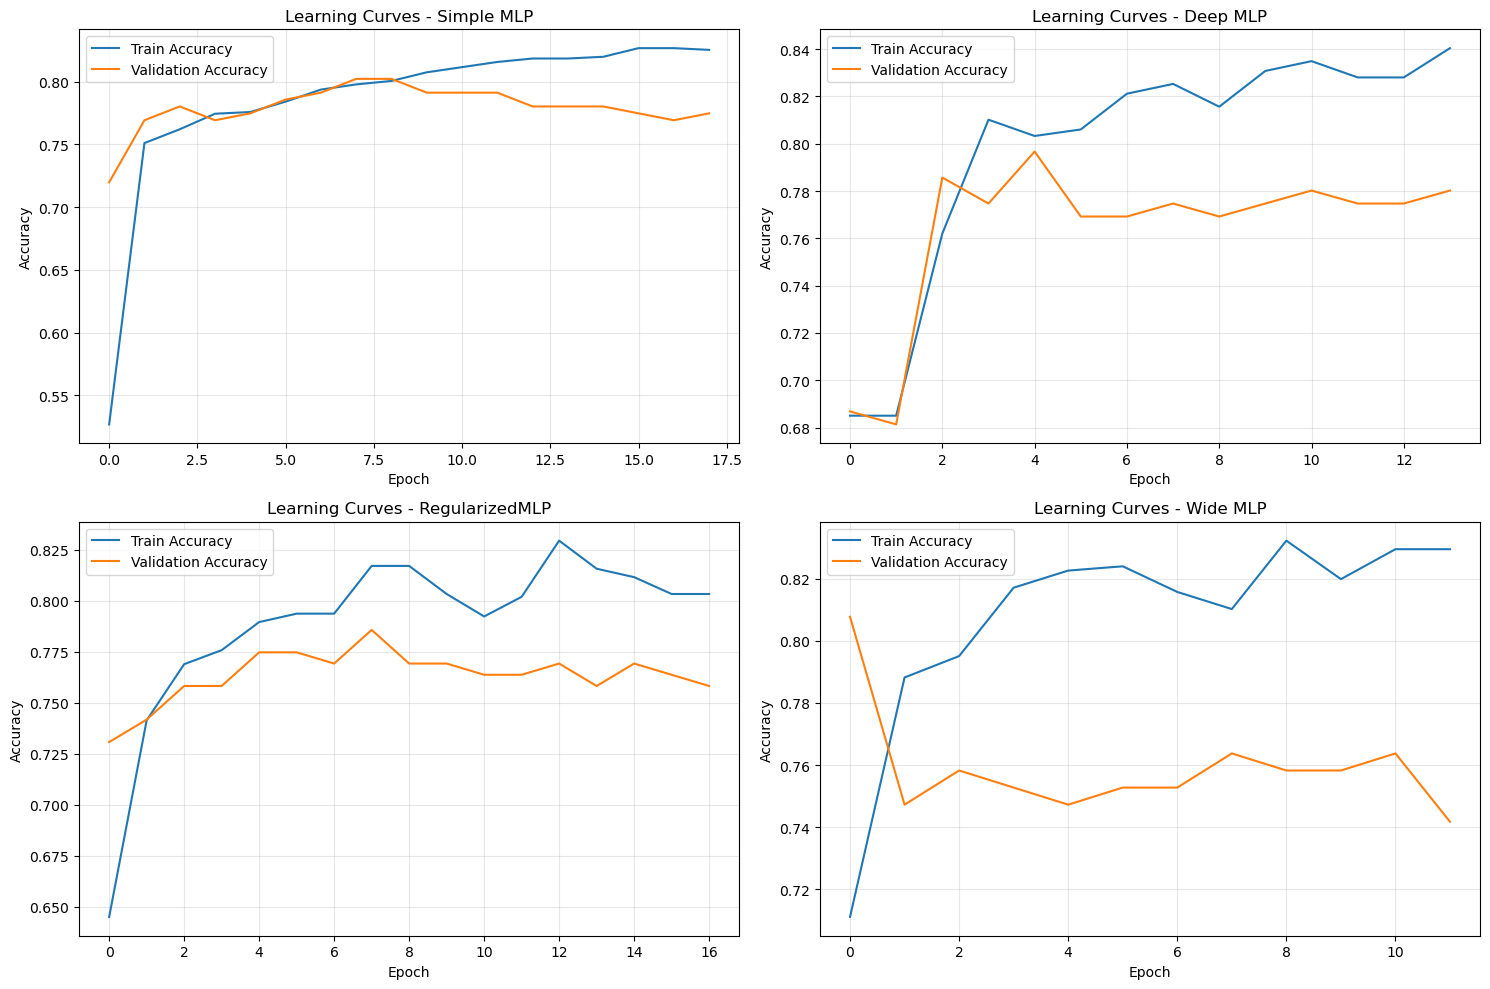

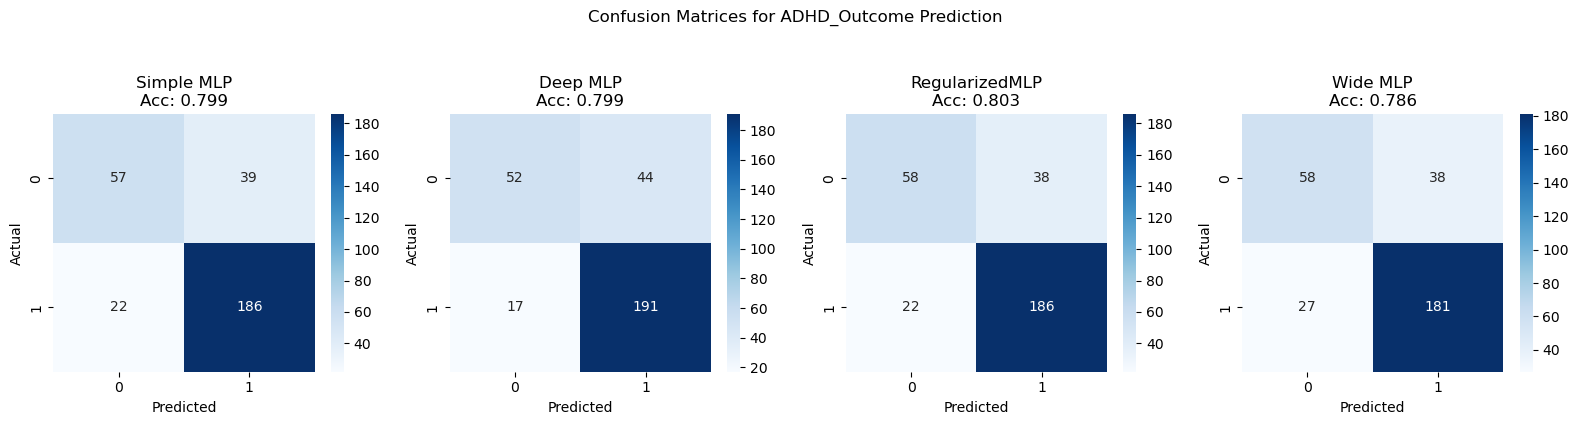

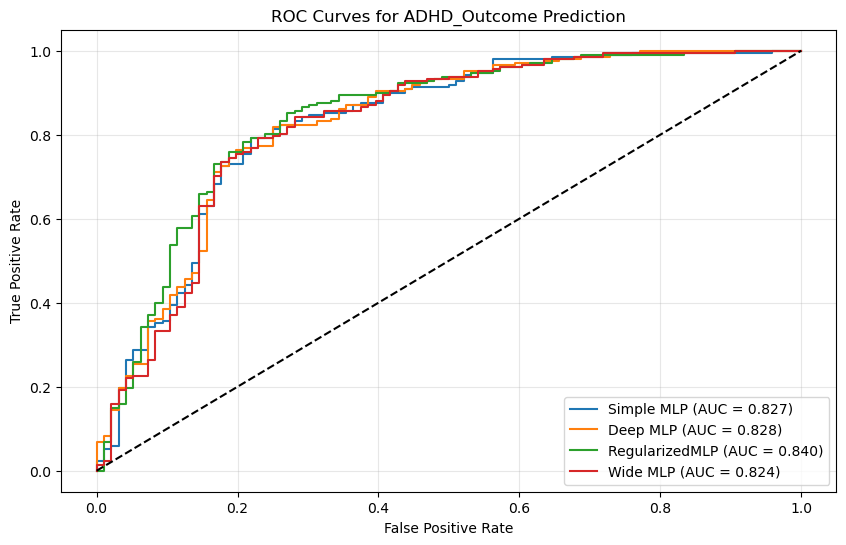

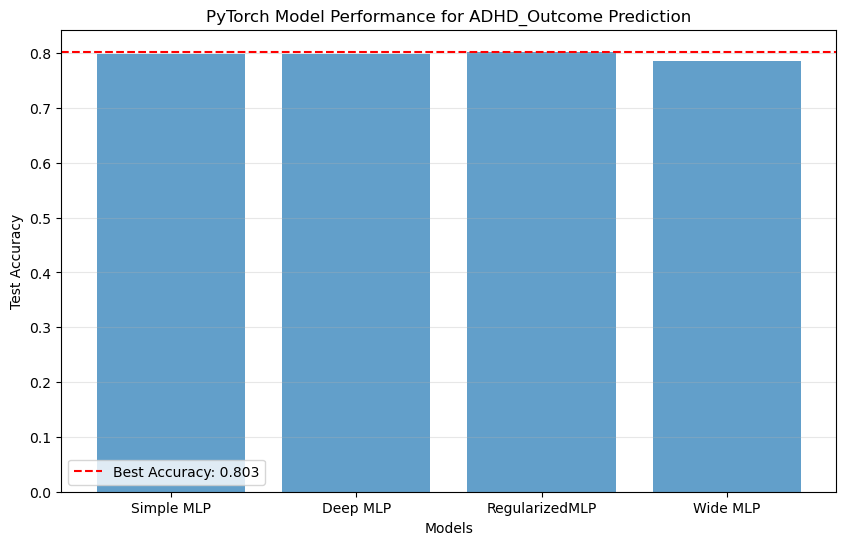

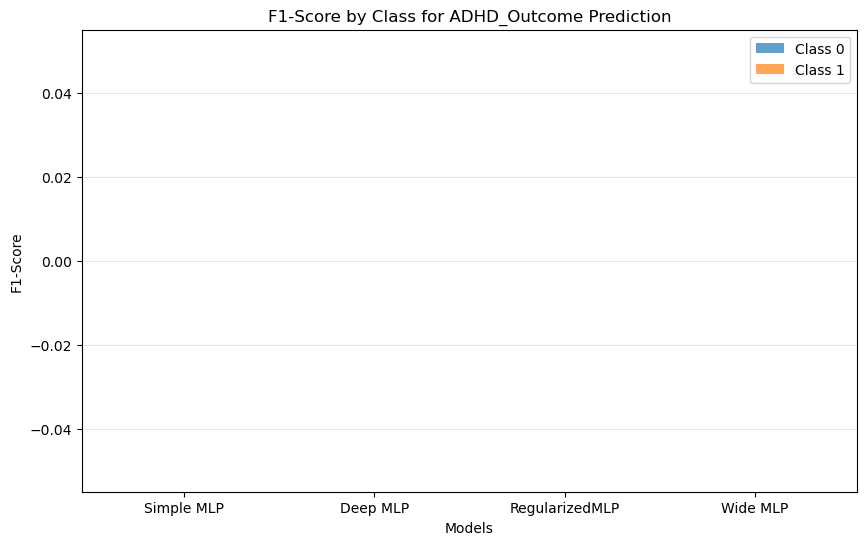


Best PyTorch model for ADHD_Outcome: RegularizedMLP with accuracy 0.8026

Classification Report for the best model:
Precision - Class 0: 0.0000, Class 1: 0.0000
Recall    - Class 0: 0.0000, Class 1: 0.0000
F1-score  - Class 0: 0.0000, Class 1: 0.0000
Support   - Class 0: 0.0, Class 1: 0.0

Target 'Sex_F' distribution: [797 416]

Evaluating PyTorch deep learning models for predicting Sex_F
Training set size: 727, Validation set size: 182, Test set size: 304
Class distribution in training set: [477 250]
Class distribution in test set: [200 104]

Training Simple MLP...
Early stopping at epoch 24

Training Deep MLP...
Early stopping at epoch 20

Training RegularizedMLP...
Early stopping at epoch 24

Training Wide MLP...
Early stopping at epoch 17


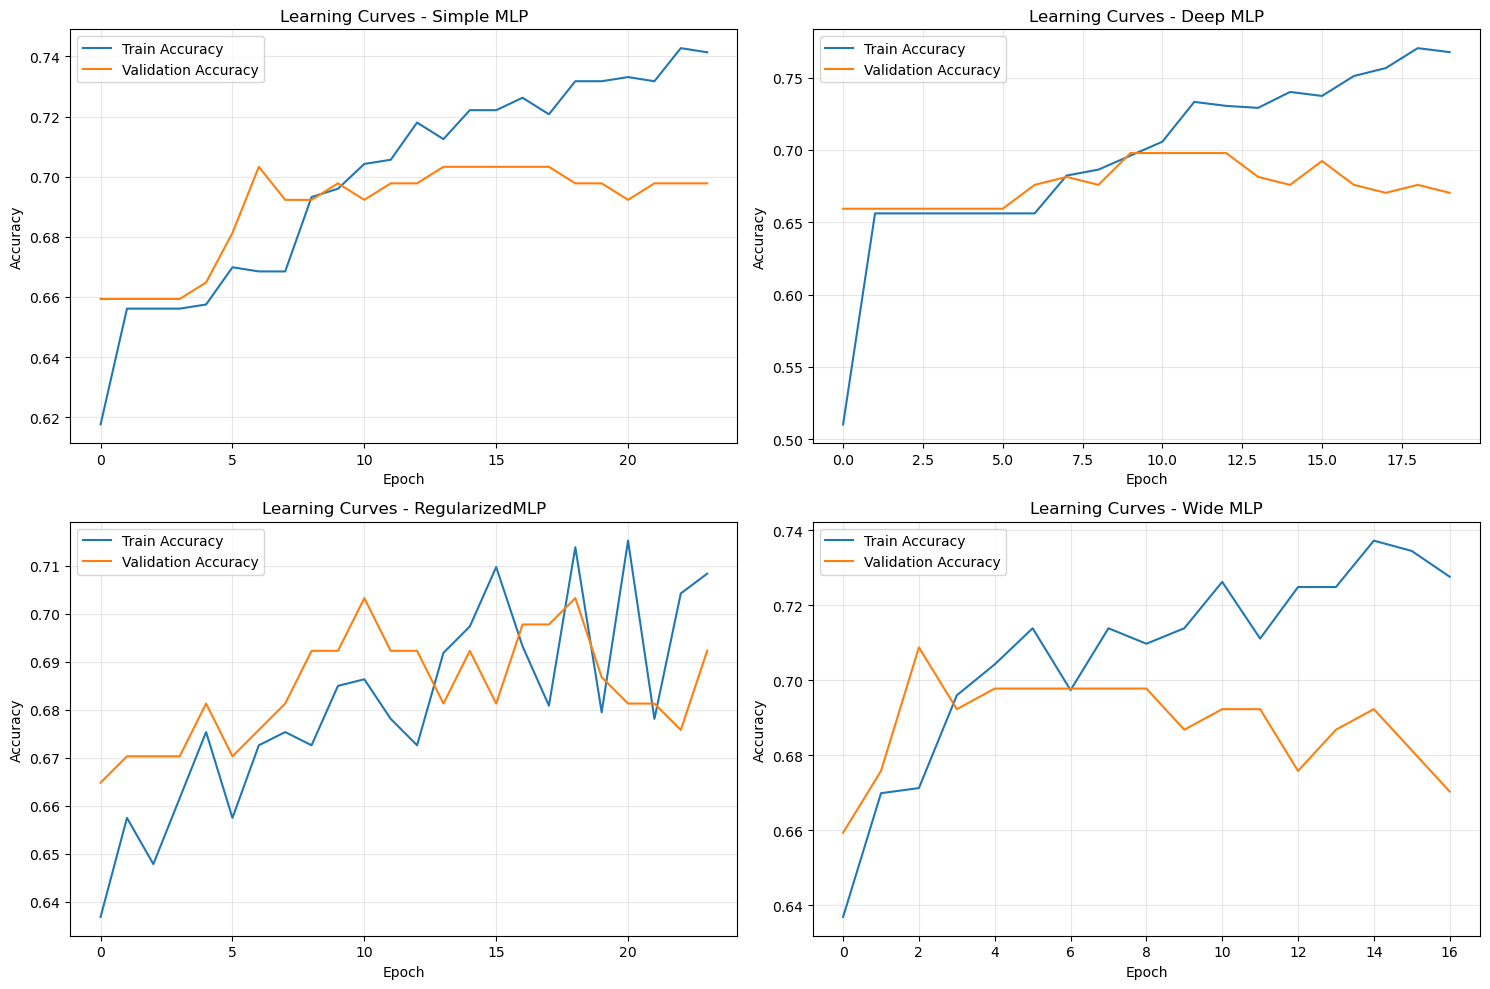

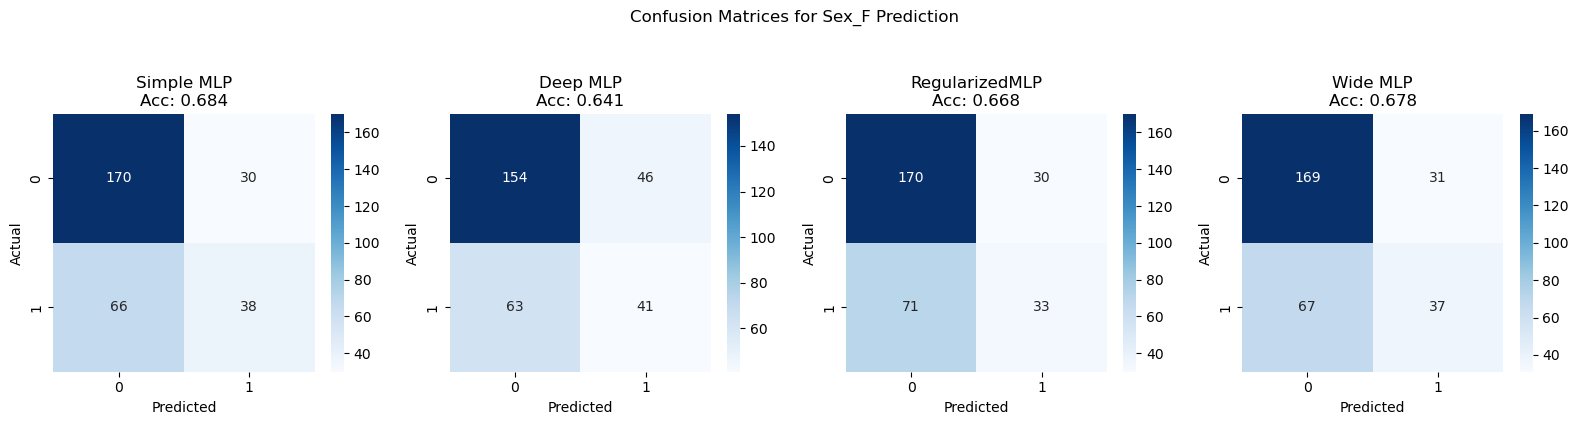

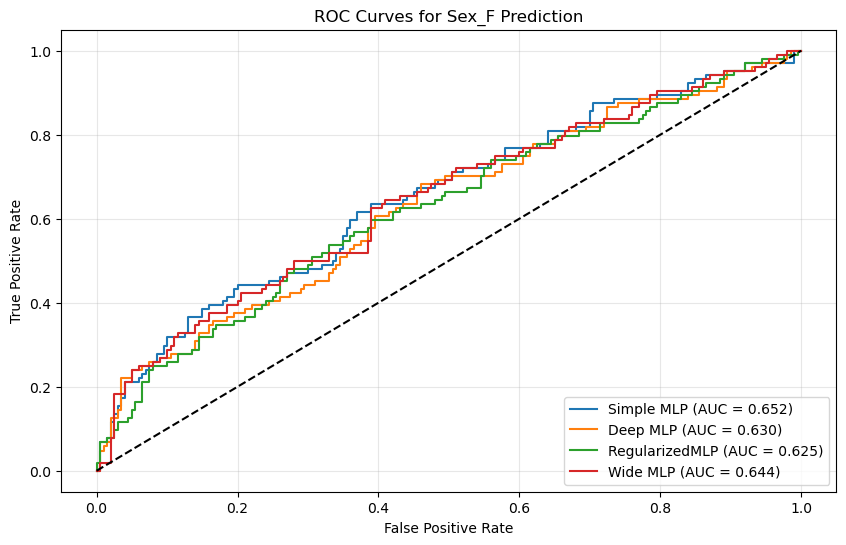

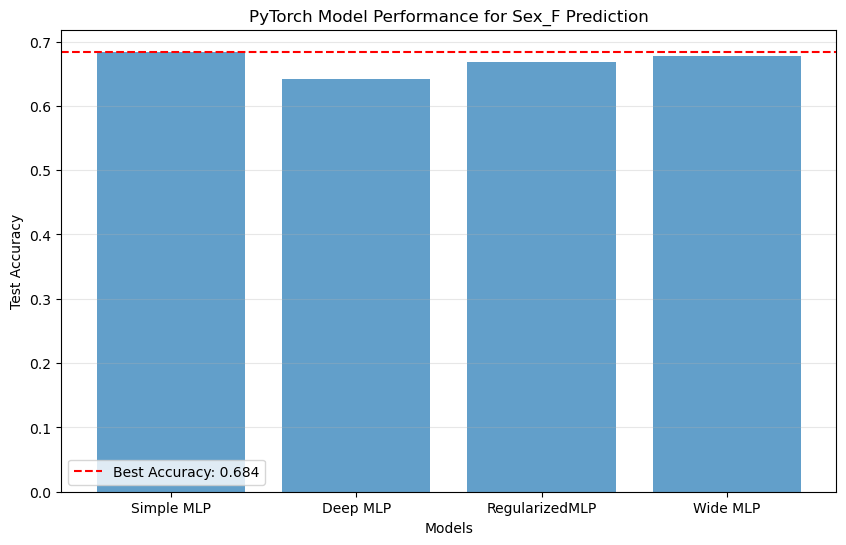

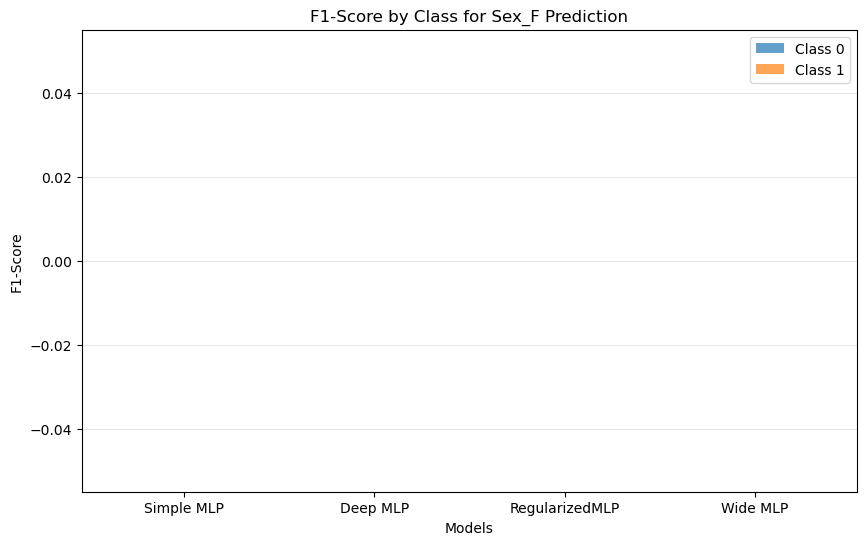


Best PyTorch model for Sex_F: Simple MLP with accuracy 0.6842

Classification Report for the best model:
Precision - Class 0: 0.0000, Class 1: 0.0000
Recall    - Class 0: 0.0000, Class 1: 0.0000
F1-score  - Class 0: 0.0000, Class 1: 0.0000
Support   - Class 0: 0.0, Class 1: 0.0

FINAL PYTORCH MODEL RECOMMENDATIONS:

For ADHD_Outcome:
  Recommended model: RegularizedMLP
  Test accuracy: 0.8026

  Performance of all PyTorch models:
    Simple MLP: Test acc = 0.7993, F1-score (Class 1) = 0.0000
    Deep MLP: Test acc = 0.7993, F1-score (Class 1) = 0.0000
    RegularizedMLP: Test acc = 0.8026, F1-score (Class 1) = 0.0000
    Wide MLP: Test acc = 0.7862, F1-score (Class 1) = 0.0000

For Sex_F:
  Recommended model: Simple MLP
  Test accuracy: 0.6842

  Performance of all PyTorch models:
    Simple MLP: Test acc = 0.6842, F1-score (Class 1) = 0.0000
    Deep MLP: Test acc = 0.6414, F1-score (Class 1) = 0.0000
    RegularizedMLP: Test acc = 0.6678, F1-score (Class 1) = 0.0000
    Wide MLP: Te

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve

# For PyTorch deep learning models
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# Set random seeds for reproducibility
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed(42)

# Check for available device (GPU or CPU)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Custom dataset class for PyTorch - Fixed version
class BinaryClassificationDataset(Dataset):
    def __init__(self, X, y):
        # Convert to numpy arrays first if they're pandas objects
        if isinstance(X, pd.DataFrame) or isinstance(X, pd.Series):
            X = X.values
        if isinstance(y, pd.DataFrame) or isinstance(y, pd.Series):
            y = y.values
            
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y.reshape(-1, 1))
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# PyTorch model definitions
class SimpleMLP(nn.Module):
    def __init__(self, input_dim):
        super(SimpleMLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.layers(x)

class DeepMLP(nn.Module):
    def __init__(self, input_dim):
        super(DeepMLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.layers(x)

class RegularizedMLP(nn.Module):
    def __init__(self, input_dim):
        super(RegularizedMLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.layers(x)

class WideMLP(nn.Module):
    def __init__(self, input_dim):
        super(WideMLP, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.layers(x)

# Function to train PyTorch model
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=100, patience=10):
    model.to(device)
    
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
    
    best_val_loss = float('inf')
    best_model_state = None
    counter = 0
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            # Zero the parameter gradients
            optimizer.zero_grad()
            
            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass and optimize
            loss.backward()
            optimizer.step()
            
            # Statistics
            running_loss += loss.item() * inputs.size(0)
            predicted = (outputs > 0.5).float()
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        epoch_loss = running_loss / total
        epoch_acc = correct / total
        train_losses.append(epoch_loss)
        train_accs.append(epoch_acc)
        
        # Validation phase
        model.eval()
        running_loss = 0.0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                
                # Forward pass
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                # Statistics
                running_loss += loss.item() * inputs.size(0)
                predicted = (outputs > 0.5).float()
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        
        val_loss = running_loss / total
        val_acc = correct / total
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        
        # Early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict().copy()
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                print(f"Early stopping at epoch {epoch+1}")
                break
    
    # Load best model
    model.load_state_dict(best_model_state)
    
    return model, {'train_losses': train_losses, 'val_losses': val_losses, 
                  'train_accs': train_accs, 'val_accs': val_accs}

# Function to evaluate PyTorch model
def evaluate_model(model, test_loader):
    model.eval()
    
    all_preds = []
    all_probs = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            probs = outputs.cpu().numpy()
            preds = (outputs > 0.5).float().cpu().numpy()
            
            all_probs.extend(probs)
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().numpy())
    
    return np.array(all_preds).flatten(), np.array(all_probs).flatten(), np.array(all_labels).flatten()

# Function to handle errors in model training
def train_with_error_handling(model, train_loader, val_loader, criterion, optimizer):
    try:
        return train_model(model, train_loader, val_loader, criterion, optimizer)
    except Exception as e:
        print(f"Error during training: {e}")
        print("Attempting simplified training...")
        
        # Try with a simpler model if there are issues
        input_dim = next(iter(train_loader))[0].shape[1]
        simple_model = SimpleMLP(input_dim)
        simple_optimizer = optim.Adam(simple_model.parameters(), lr=0.001)
        return train_model(simple_model, train_loader, val_loader, criterion, simple_optimizer)

# Function to safely get metrics from classification report
def safe_get_metric(report, class_label, metric):
    try:
        return report[class_label][metric]
    except KeyError:
        print(f"Warning: Class '{class_label}' or metric '{metric}' not found in report")
        return 0.0

# Function to evaluate deep learning models
def evaluate_dl_models(X, y, target_name, random_state=42):
    """
    Train and evaluate multiple PyTorch deep learning models for comparison
    """
    print(f"\n{'='*50}")
    print(f"Evaluating PyTorch deep learning models for predicting {target_name}")
    print(f"{'='*50}")
    
    # Check if there are enough samples of each class
    y_values = np.array(y)
    class_counts = np.bincount(y_values)
    if len(class_counts) < 2 or min(class_counts) < 10:
        print(f"WARNING: Insufficient samples for some classes. Class distribution: {class_counts}")
        print("Deep learning models require sufficient samples of each class.")
        print("Consider using traditional ML models or data augmentation techniques.")
        return {
            'accuracy_scores': {},
            'results': {},
            'best_model': None,
            'histories': {}
        }
    
    # Define models to evaluate
    model_names = ['Simple MLP', 'Deep MLP', 'RegularizedMLP', 'Wide MLP']
    
    # Split data into training and testing sets using stratification
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.25, random_state=random_state, stratify=y
        )
        
        # Further split training data to create a validation set
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size=0.2, random_state=random_state, stratify=y_train
        )
    except ValueError as e:
        print(f"Error in train-test split: {e}")
        print("Trying non-stratified split as fallback")
        # Fallback to non-stratified split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.25, random_state=random_state
        )
        X_train, X_val, y_train, y_val = train_test_split(
            X_train, y_train, test_size=0.2, random_state=random_state
        )
    
    print(f"Training set size: {X_train.shape[0]}, Validation set size: {X_val.shape[0]}, Test set size: {X_test.shape[0]}")
    print(f"Class distribution in training set: {np.bincount(y_train.astype(int))}")
    print(f"Class distribution in test set: {np.bincount(y_test.astype(int))}")
    
    # Standard scaler for preprocessing
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)
    
    # Create PyTorch datasets
    try:
        train_dataset = BinaryClassificationDataset(X_train_scaled, y_train)
        val_dataset = BinaryClassificationDataset(X_val_scaled, y_val)
        test_dataset = BinaryClassificationDataset(X_test_scaled, y_test)
        
        # Create data loaders
        train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
        test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    except Exception as e:
        print(f"Error creating datasets or dataloaders: {e}")
        return {
            'accuracy_scores': {},
            'results': {},
            'best_model': None,
            'histories': {}
        }
    
    # Prepare collections for results
    histories = {}
    results = {}
    confusion_matrices = {}
    roc_data = {}
    accuracy_scores = {}
    
    # Define loss function
    criterion = nn.BCELoss()
    
    # Get input dimension
    input_dim = X_train_scaled.shape[1]
    
    # Evaluate each model
    for model_name in model_names:
        print(f"\nTraining {model_name}...")
        
        # Create model based on name
        try:
            if model_name == 'Simple MLP':
                model = SimpleMLP(input_dim)
            elif model_name == 'Deep MLP':
                model = DeepMLP(input_dim)
            elif model_name == 'RegularizedMLP':
                model = RegularizedMLP(input_dim)
            elif model_name == 'Wide MLP':
                model = WideMLP(input_dim)
            else:
                # Fallback to simple model if name not recognized
                print(f"Unknown model name: {model_name}. Using Simple MLP instead.")
                model = SimpleMLP(input_dim)
            
            # Define optimizer
            optimizer = optim.Adam(model.parameters(), lr=0.001)
            
            # Train model with error handling
            trained_model, history = train_with_error_handling(
                model, train_loader, val_loader, criterion, optimizer
            )
            
            # Store training history
            histories[model_name] = history
            
            # Evaluate model on test data
            y_pred, y_pred_prob, y_true = evaluate_model(trained_model, test_loader)
            
            # Calculate metrics
            accuracy = accuracy_score(y_true, y_pred)
            accuracy_scores[model_name] = accuracy
            
            # Store classification report
            try:
                report = classification_report(y_true, y_pred, output_dict=True)
                results[model_name] = report
            except Exception as e:
                print(f"Error generating classification report: {e}")
                # Create a simple report manually
                results[model_name] = {
                    '0': {'precision': 0, 'recall': 0, 'f1-score': 0, 'support': 0},
                    '1': {'precision': 0, 'recall': 0, 'f1-score': 0, 'support': 0}
                }
            
            # Store confusion matrix
            try:
                cm = confusion_matrix(y_true, y_pred)
                confusion_matrices[model_name] = cm
            except Exception as e:
                print(f"Error generating confusion matrix: {e}")
                confusion_matrices[model_name] = np.array([[0, 0], [0, 0]])
            
            # Get ROC curve data
            try:
                fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
                auc = roc_auc_score(y_true, y_pred_prob)
                roc_data[model_name] = (fpr, tpr, auc)
            except Exception as e:
                print(f"Error generating ROC data: {e}")
                # Create dummy ROC data
                roc_data[model_name] = (np.array([0, 1]), np.array([0, 1]), 0.5)
            
        except Exception as e:
            print(f"Error with {model_name}: {e}")
            print(f"Skipping {model_name}...")
        
        # Clean up to free memory
        if torch.cuda.is_available():
            torch.cuda.empty_cache()
    
    # Skip visualization if no models were successfully trained
    if not accuracy_scores:
        print("No models were successfully trained. Skipping visualization.")
        return {
            'accuracy_scores': {},
            'results': {},
            'best_model': None,
            'histories': {}
        }
    
    # For visualization of learning curves
    plt.figure(figsize=(15, 10))
    for i, (model_name, history) in enumerate(histories.items()):
        plt.subplot(2, 2, i+1)
        plt.plot(history['train_accs'], label='Train Accuracy')
        plt.plot(history['val_accs'], label='Validation Accuracy')
        plt.title(f'Learning Curves - {model_name}')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # Create comparison plots
    # 1. Confusion Matrices (side by side)
    plt.figure(figsize=(16, 4))
    plt.suptitle(f'Confusion Matrices for {target_name} Prediction', y=1.05)
    
    for i, (model_name, cm) in enumerate(confusion_matrices.items()):
        plt.subplot(1, len(confusion_matrices), i+1)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['0', '1'], yticklabels=['0', '1'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'{model_name}\nAcc: {accuracy_scores[model_name]:.3f}')
    
    plt.tight_layout()
    plt.show()
    
    # 2. ROC Curves (all in one plot)
    plt.figure(figsize=(10, 6))
    
    for model_name, (fpr, tpr, auc) in roc_data.items():
        plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.3f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves for {target_name} Prediction')
    plt.legend(loc='lower right')
    plt.grid(alpha=0.3)
    plt.show()
    
    # 3. Accuracy comparison
    plt.figure(figsize=(10, 6))
    
    model_names_list = list(accuracy_scores.keys())
    accuracies = [accuracy_scores[model] for model in model_names_list]
    
    plt.bar(model_names_list, accuracies, alpha=0.7)
    plt.axhline(y=max(accuracies), color='r', linestyle='--', 
                label=f'Best Accuracy: {max(accuracies):.3f}')
    
    plt.xlabel('Models')
    plt.ylabel('Test Accuracy')
    plt.title(f'PyTorch Model Performance for {target_name} Prediction')
    plt.xticks(rotation=0)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.show()
    
    # 4. F1-Score comparison
    plt.figure(figsize=(10, 6))
    
    # Safely get F1 scores
    f1_scores_class1 = [safe_get_metric(results[model], '1', 'f1-score') for model in model_names_list]
    f1_scores_class0 = [safe_get_metric(results[model], '0', 'f1-score') for model in model_names_list]
    
    x = np.arange(len(model_names_list))
    width = 0.35
    
    plt.bar(x - width/2, f1_scores_class0, width, label='Class 0', alpha=0.7)
    plt.bar(x + width/2, f1_scores_class1, width, label='Class 1', alpha=0.7)
    
    plt.xlabel('Models')
    plt.ylabel('F1-Score')
    plt.title(f'F1-Score by Class for {target_name} Prediction')
    plt.xticks(x, model_names_list)
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.show()
    
    # Print classification report for the best model
    best_model = max(accuracy_scores.items(), key=lambda x: x[1])[0]
    print(f"\nBest PyTorch model for {target_name}: {best_model} with accuracy {accuracy_scores[best_model]:.4f}")
    print("\nClassification Report for the best model:")
    cls_report = results[best_model]
    print(f"Precision - Class 0: {safe_get_metric(cls_report, '0', 'precision'):.4f}, " + 
          f"Class 1: {safe_get_metric(cls_report, '1', 'precision'):.4f}")
    print(f"Recall    - Class 0: {safe_get_metric(cls_report, '0', 'recall'):.4f}, " + 
          f"Class 1: {safe_get_metric(cls_report, '1', 'recall'):.4f}")
    print(f"F1-score  - Class 0: {safe_get_metric(cls_report, '0', 'f1-score'):.4f}, " + 
          f"Class 1: {safe_get_metric(cls_report, '1', 'f1-score'):.4f}")
    print(f"Support   - Class 0: {safe_get_metric(cls_report, '0', 'support')}, " + 
          f"Class 1: {safe_get_metric(cls_report, '1', 'support')}")
    
    return {
        'accuracy_scores': accuracy_scores,
        'results': results,
        'best_model': best_model,
        'histories': histories
    }

# Main function to run the analysis
def main():
    # Load the dataset
    try:
        selected_df = pd.read_csv('selected_features_dual_target.csv')
        print("Using the filtered features dataset.")
    except:
        try:
            selected_df = train_df_50
            print("Using the original dataset.")
        except NameError:
            print("Dataset not found. Creating a simple synthetic dataset for demonstration.")
            # Create a synthetic dataset
            from sklearn.datasets import make_classification
            X_synth, y_synth = make_classification(
                n_samples=1000, n_features=20, n_informative=10, 
                n_redundant=5, n_clusters_per_class=2, random_state=42
            )
            # Create a second target
            X_synth2, y_synth2 = make_classification(
                n_samples=1000, n_features=20, n_informative=10,
                n_redundant=5, n_clusters_per_class=2, random_state=43
            )
            
            selected_df = pd.DataFrame(X_synth, columns=[f'feature_{i+1}' for i in range(20)])
            selected_df['ADHD_Outcome'] = y_synth
            selected_df['Sex_F'] = y_synth2
    
    print(f"Dataset shape: {selected_df.shape}")
    
    # Check for missing values
    missing_values = selected_df.isnull().sum().sum()
    if missing_values > 0:
        print(f"Warning: Dataset contains {missing_values} missing values. Filling with mean values.")
        selected_df = selected_df.fillna(selected_df.mean())
    
    # Extract features and target variables
    target_columns = ["ADHD_Outcome", "Sex_F"]
    feature_columns = [col for col in selected_df.columns if col not in target_columns]
    
    X = selected_df[feature_columns]
    
    # Store results for final comparison
    all_results = {}
    
    # Analyze and model each target variable
    for target_name in target_columns:
        if target_name in selected_df.columns:
            y = selected_df[target_name].astype(int)
            print(f"\nTarget '{target_name}' distribution: {np.bincount(y)}")
            
            # Evaluate PyTorch deep learning models for this target
            results = evaluate_dl_models(X, y, target_name)
            all_results[target_name] = results
        else:
            print(f"\nTarget variable '{target_name}' not found in the dataset.")
    
    # Final comparison of both targets
    if len(all_results) == 2:
        print("\n" + "="*70)
        print("FINAL PYTORCH MODEL RECOMMENDATIONS:")
        print("="*70)
        
        # Check if any models were trained successfully for both targets
        if (all_results["ADHD_Outcome"].get("best_model") and 
            all_results["Sex_F"].get("best_model")):
            
            for target_name, results in all_results.items():
                best_model = results['best_model']
                if best_model:
                    best_accuracy = results['accuracy_scores'][best_model]
                    
                    print(f"\nFor {target_name}:")
                    print(f"  Recommended model: {best_model}")
                    print(f"  Test accuracy: {best_accuracy:.4f}")
                    
                    # Compare performance across all models
                    print("\n  Performance of all PyTorch models:")
                    for model, acc in results['accuracy_scores'].items():
                        f1_class1 = safe_get_metric(results['results'][model], '1', 'f1-score')
                        print(f"    {model}: Test acc = {acc:.4f}, F1-score (Class 1) = {f1_class1:.4f}")
            
            # Overall recommendation
            print("\nOVERALL RECOMMENDATION:")
            adhd_best = all_results['ADHD_Outcome']['best_model']
            sex_best = all_results['Sex_F']['best_model']
            
            print(f"  For ADHD_Outcome prediction: {adhd_best}")
            print(f"  For Sex_F prediction: {sex_best}")
            
            if adhd_best == sex_best:
                print(f"\n  {adhd_best} performs well for both targets and can be used as a single model approach.")
            else:
                print("\n  Different models perform best for each target. Consider using:")
                print(f"  - {adhd_best} specifically for ADHD prediction")
                print(f"  - {sex_best} specifically for Sex prediction")
        else:
            print("\nUnable to provide recommendations as models did not train successfully.")
            print("Consider trying traditional machine learning models instead.")

# Run the main function
if __name__ == "__main__":
    main()

Using the filtered features dataset.

PERFORMANCE DRIVERS ANALYSIS FOR ADHD_Outcome

1. FEATURE IMPORTANCE ANALYSIS
-------------------------------

Top 10 features according to Random Forest importance:
                       Feature  RF_Importance
0        SDQ_SDQ_Hyperactivity       0.145866
1        SDQ_SDQ_Externalizing       0.118600
2   SDQ_SDQ_Difficulties_Total       0.096659
3    SDQ_SDQ_Generating_Impact       0.079887
14        152throw_156thcolumn       0.077851
12        164throw_189thcolumn       0.074294
11          0throw_103thcolumn       0.068468
13        164throw_173thcolumn       0.068146
10             APQ_P_APQ_P_OPD       0.059977
9      Basic_Demos_Enroll_Year       0.042431

Top 10 features according to Gradient Boosting importance:
                       Feature  GB_Importance
0        SDQ_SDQ_Hyperactivity       0.520027
14        152throw_156thcolumn       0.090902
13        164throw_173thcolumn       0.071971
11          0throw_103thcolumn       0.058516


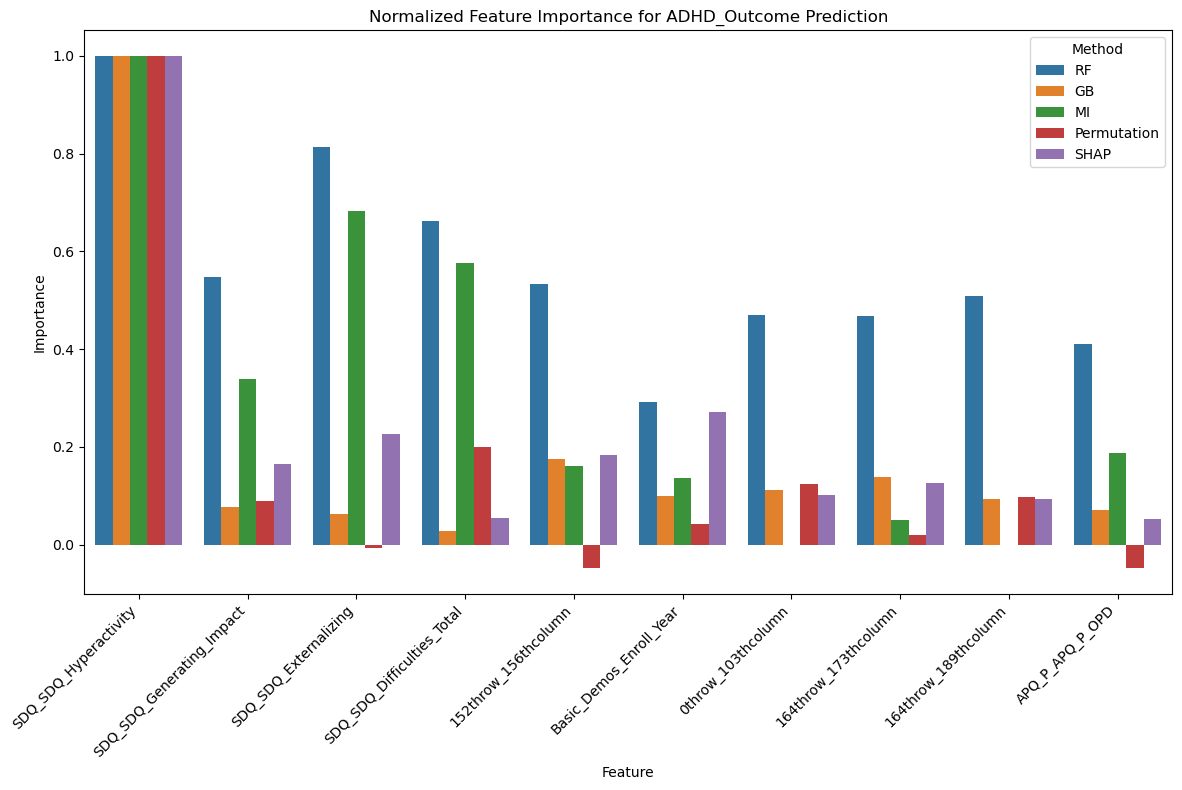

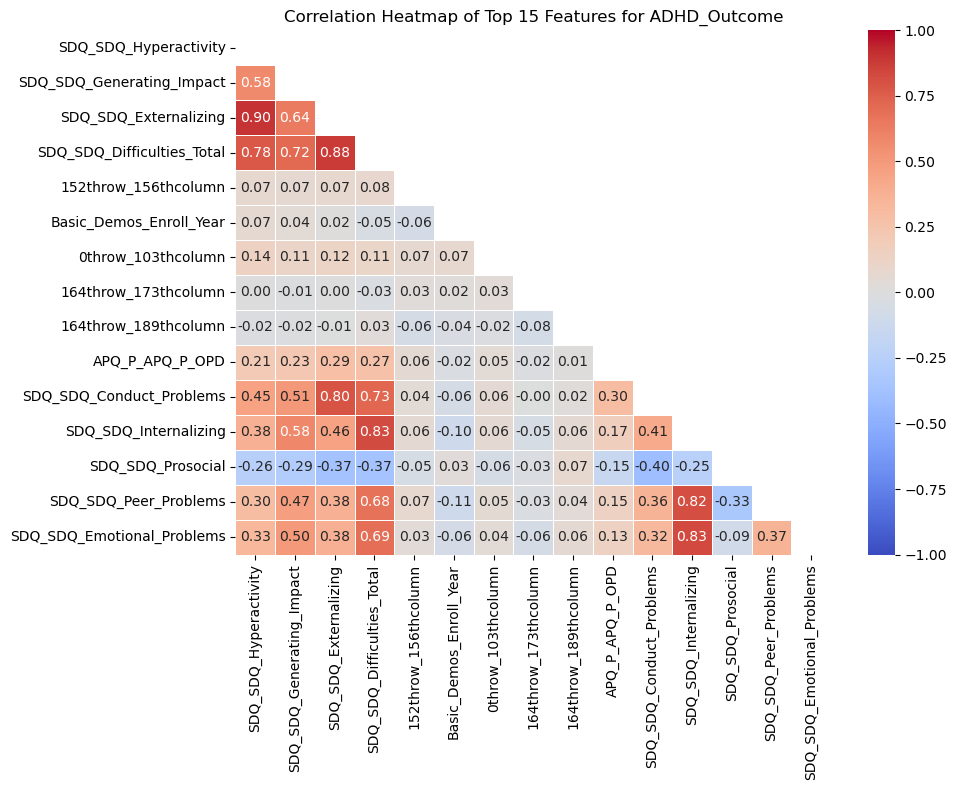

<Figure size 1200x600 with 0 Axes>

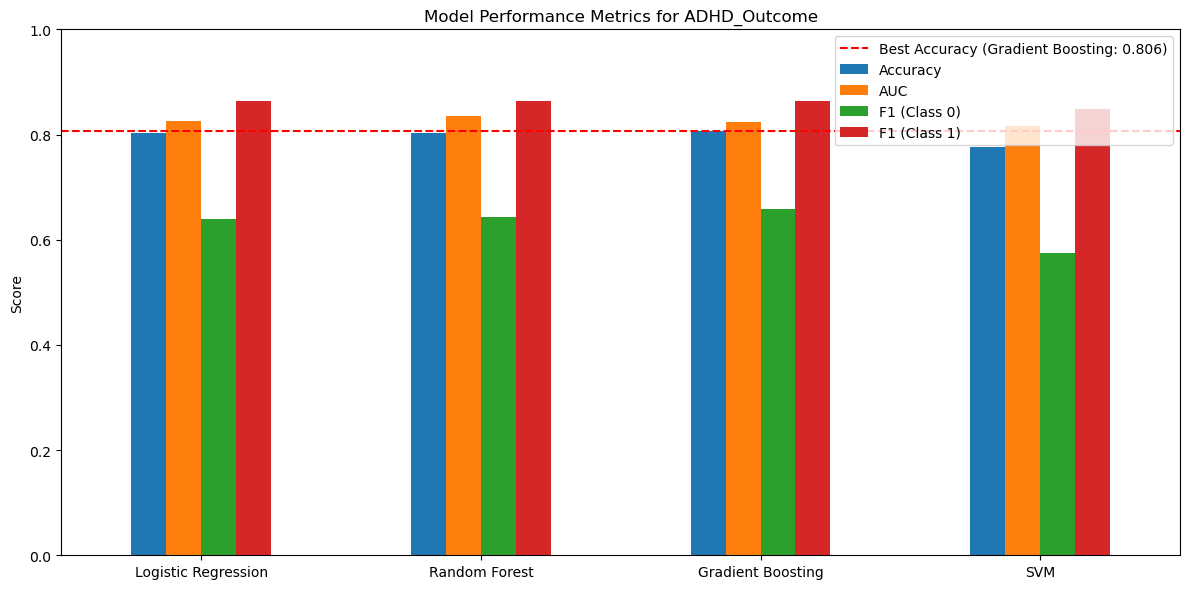

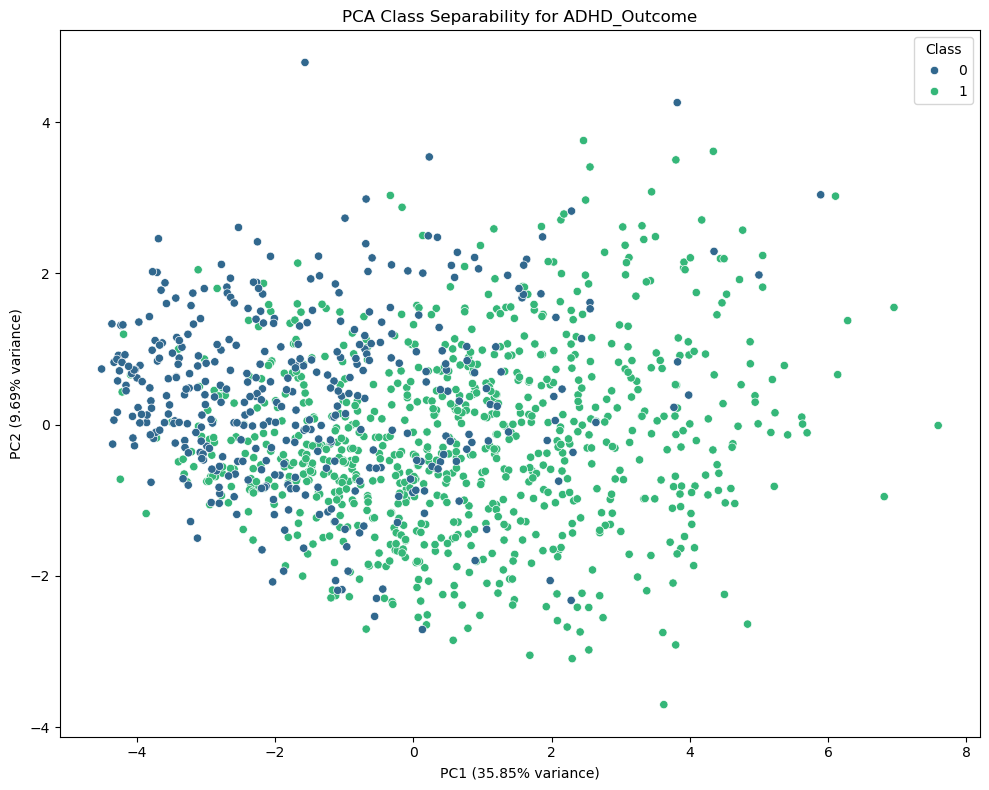


Creating visualizations for Sex_F...


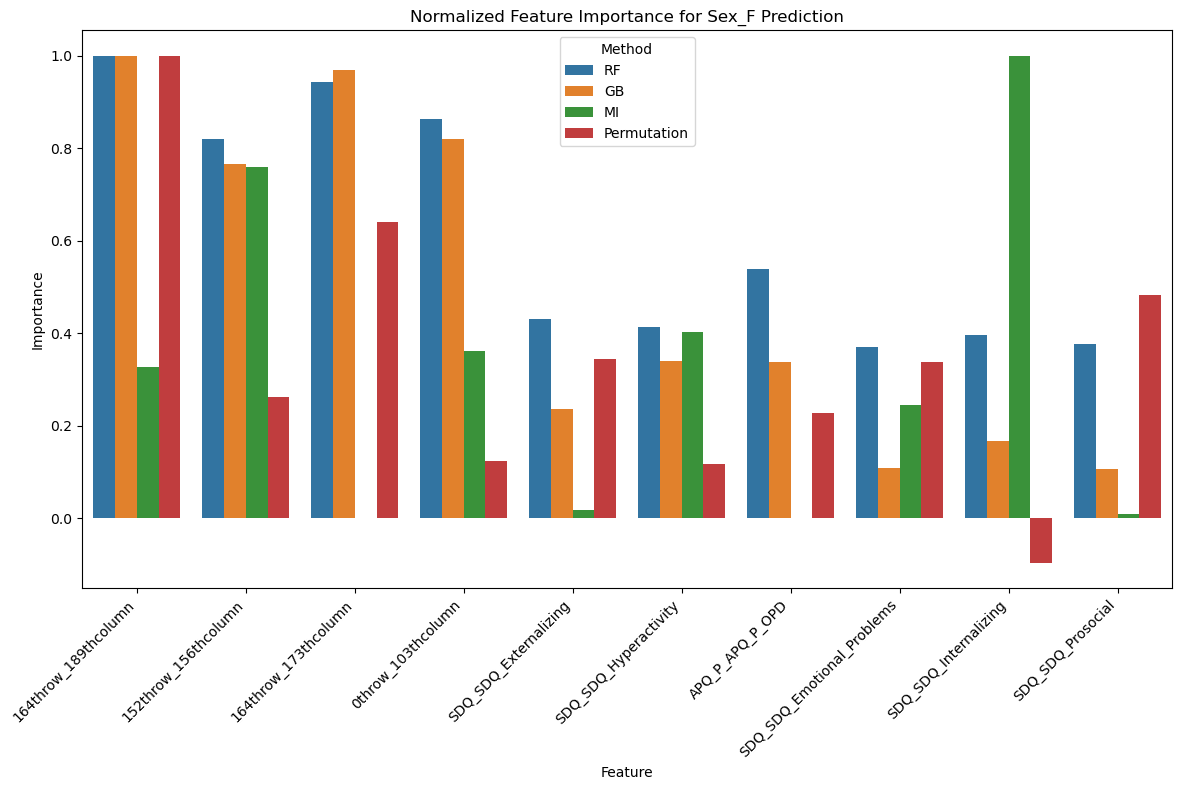

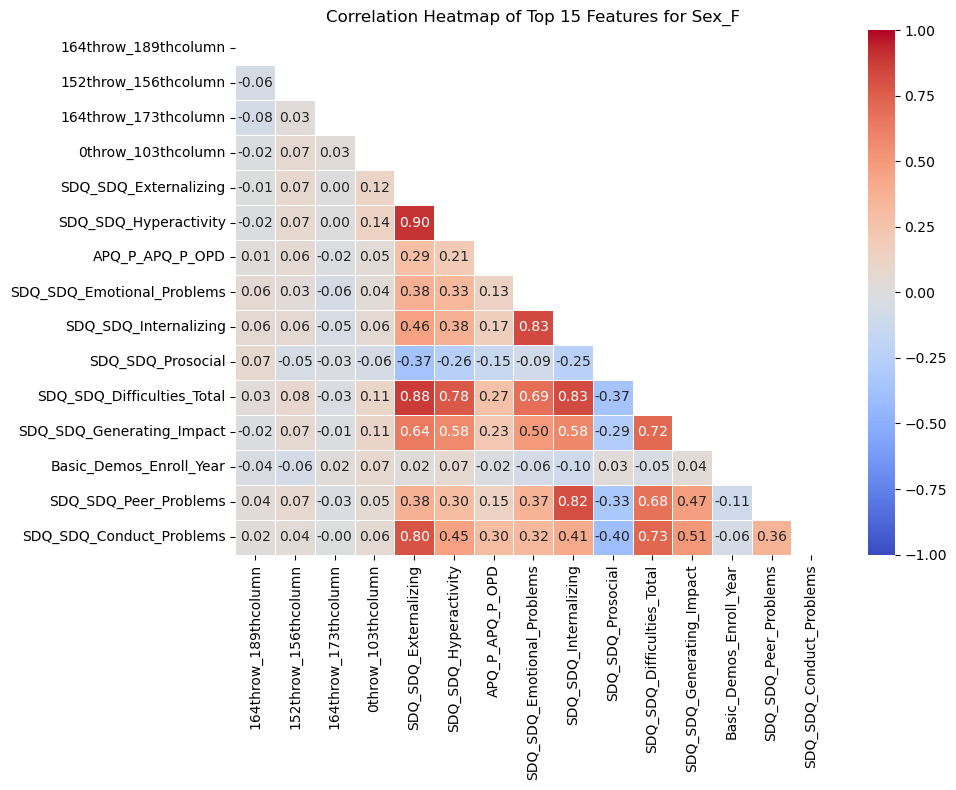

<Figure size 1200x600 with 0 Axes>

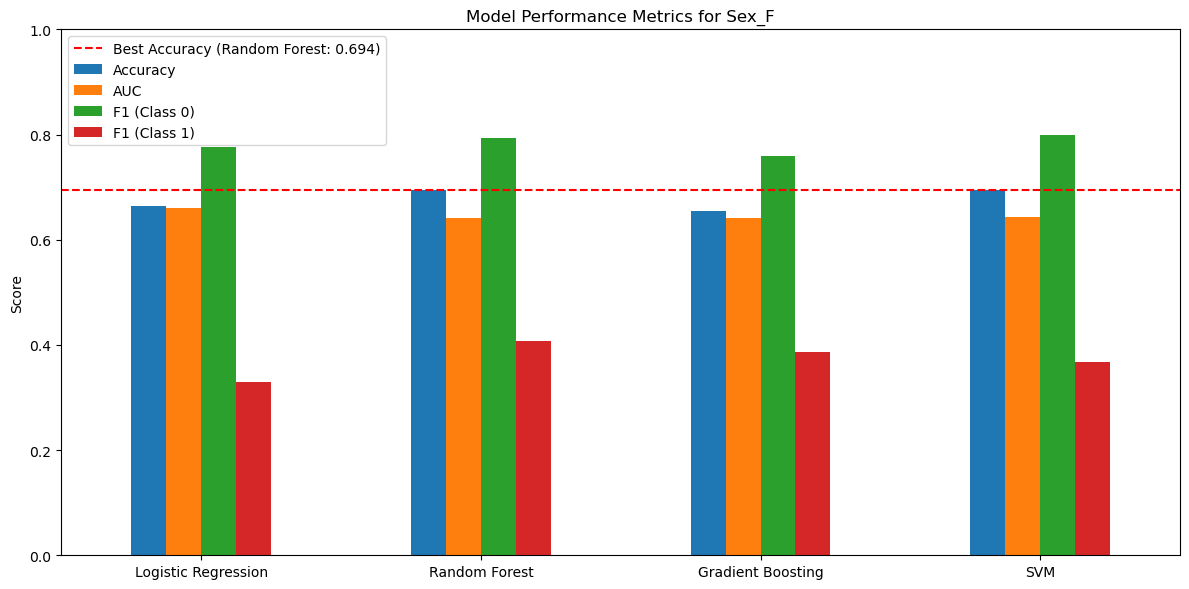

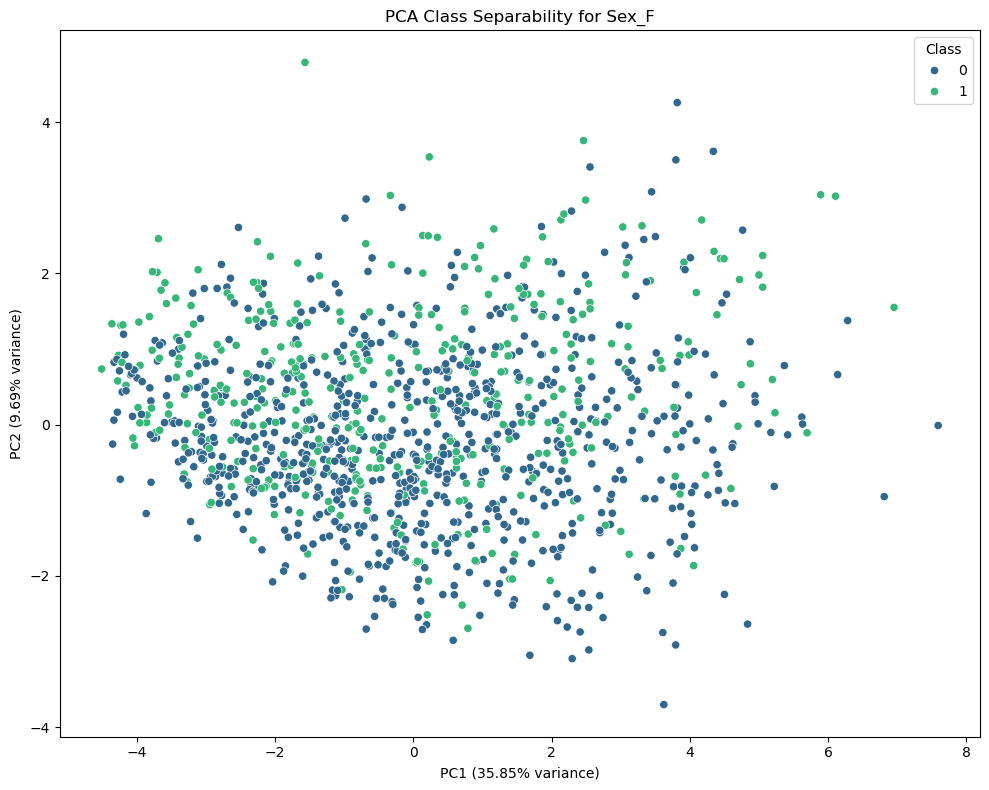


COMPARISON OF PERFORMANCE DRIVERS BETWEEN TARGETS

Common important features for both targets: SDQ_SDQ_Externalizing, APQ_P_APQ_P_OPD, 164throw_189thcolumn, 0throw_103thcolumn, SDQ_SDQ_Hyperactivity, 164throw_173thcolumn, 152throw_156thcolumn

Features specific to ADHD_Outcome: SDQ_SDQ_Difficulties_Total, SDQ_SDQ_Generating_Impact, Basic_Demos_Enroll_Year

Features specific to Sex_F: SDQ_SDQ_Emotional_Problems, SDQ_SDQ_Internalizing, SDQ_SDQ_Prosocial

Best model for ADHD_Outcome: Gradient Boosting
Best model for Sex_F: Random Forest

CONCLUSIVE REMARKS

1. Key drivers of predictive performance:
   - SDQ_SDQ_Externalizing: Important for both ADHD and Sex prediction
   - APQ_P_APQ_P_OPD: Important for both ADHD and Sex prediction
   - 164throw_189thcolumn: Important for both ADHD and Sex prediction
   - 0throw_103thcolumn: Important for both ADHD and Sex prediction
   - SDQ_SDQ_Hyperactivity: Important for both ADHD and Sex prediction

2. Features most indicative of ADHD:
   - SDQ_SDQ_

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.inspection import permutation_importance
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.decomposition import PCA
import shap
import warnings
warnings.filterwarnings('ignore')

def analyze_model_performance_drivers(X, y, target_name):
    """
    Comprehensive analysis of factors driving model performance
    """
    print(f"\n{'='*60}")
    print(f"PERFORMANCE DRIVERS ANALYSIS FOR {target_name}")
    print(f"{'='*60}")

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )
    
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Convert back to DataFrames with column names
    X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
    X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)
    
    # 1. Feature Importance Analysis
    print("\n1. FEATURE IMPORTANCE ANALYSIS")
    print("-------------------------------")
    
    # Train a Random Forest for feature importance
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train_scaled, y_train)
    
    # Random Forest feature importance
    rf_importances = pd.DataFrame({
        'Feature': X.columns,
        'RF_Importance': rf.feature_importances_
    }).sort_values('RF_Importance', ascending=False)
    
    print("\nTop 10 features according to Random Forest importance:")
    print(rf_importances.head(10))
    
    # Train a Gradient Boosting model for feature importance
    gb = GradientBoostingClassifier(random_state=42)
    gb.fit(X_train_scaled, y_train)
    
    # Gradient Boosting feature importance
    gb_importances = pd.DataFrame({
        'Feature': X.columns,
        'GB_Importance': gb.feature_importances_
    }).sort_values('GB_Importance', ascending=False)
    
    print("\nTop 10 features according to Gradient Boosting importance:")
    print(gb_importances.head(10))
    
    # Mutual Information for feature importance
    try:
        mi_scores = mutual_info_classif(X_train_scaled, y_train, random_state=42)
        mi_importances = pd.DataFrame({
            'Feature': X.columns,
            'MI_Score': mi_scores
        }).sort_values('MI_Score', ascending=False)
        
        print("\nTop 10 features according to Mutual Information:")
        print(mi_importances.head(10))
    except Exception as e:
        print(f"Mutual Information calculation failed: {e}")
        mi_importances = pd.DataFrame({'Feature': X.columns, 'MI_Score': np.zeros(len(X.columns))})
    
    # Permutation Importance (on test set)
    try:
        perm_importance = permutation_importance(rf, X_test_scaled, y_test, n_repeats=10, random_state=42)
        perm_importances = pd.DataFrame({
            'Feature': X.columns,
            'Permutation_Importance': perm_importance.importances_mean
        }).sort_values('Permutation_Importance', ascending=False)
        
        print("\nTop 10 features according to Permutation Importance:")
        print(perm_importances.head(10))
    except Exception as e:
        print(f"Permutation importance calculation failed: {e}")
        perm_importances = pd.DataFrame({'Feature': X.columns, 'Permutation_Importance': np.zeros(len(X.columns))})
    
    # 2. Feature Relationship Analysis
    print("\n2. FEATURE RELATIONSHIPS ANALYSIS")
    print("---------------------------------")
    
    # Correlation matrix of top features
    top_features = list(set(
        list(rf_importances['Feature'].head(10)) + 
        list(gb_importances['Feature'].head(10))
    ))
    
    if len(top_features) > 15:
        top_features = top_features[:15]
    
    corr_matrix = X[top_features].corr()
    
    print(f"\nCorrelation matrix of top {len(top_features)} features:")
    print(corr_matrix)
    
    # Find highly correlated feature pairs
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > 0.7:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    
    if high_corr_pairs:
        print("\nHighly correlated feature pairs (|r| > 0.7):")
        for f1, f2, corr in high_corr_pairs:
            print(f"  {f1} and {f2}: r = {corr:.3f}")
    else:
        print("\nNo highly correlated feature pairs found.")
    
    # 3. Class Separability Analysis
    print("\n3. CLASS SEPARABILITY ANALYSIS")
    print("------------------------------")
    
    # Run PCA to check class separability
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_train_scaled)
    
    print(f"\nPCA explained variance ratio: {pca.explained_variance_ratio_}")
    print(f"Total variance explained by first two components: {sum(pca.explained_variance_ratio_):.3f}")
    
    # Top contributing features to principal components
    pc_components = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i+1}' for i in range(2)],
        index=X.columns
    )
    
    print("\nTop 5 features contributing to PC1:")
    print(pc_components['PC1'].abs().sort_values(ascending=False).head(5))
    
    print("\nTop 5 features contributing to PC2:")
    print(pc_components['PC2'].abs().sort_values(ascending=False).head(5))
    
    # 4. Model-Specific Performance Analysis
    print("\n4. MODEL-SPECIFIC PERFORMANCE ANALYSIS")
    print("--------------------------------------")
    
    # Train different models
    models = {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingClassifier(random_state=42),
        'SVM': SVC(probability=True, random_state=42)
    }
    
    model_performance = {}
    
    for name, model in models.items():
        try:
            # Train the model
            model.fit(X_train_scaled, y_train)
            
            # Predict
            y_pred = model.predict(X_test_scaled)
            
            # Calculate metrics
            accuracy = (y_pred == y_test).mean()
            try:
                y_prob = model.predict_proba(X_test_scaled)[:, 1]
                auc = roc_auc_score(y_test, y_prob)
            except:
                auc = np.nan
            
            report = classification_report(y_test, y_pred, output_dict=True)
            
            model_performance[name] = {
                'accuracy': accuracy,
                'auc': auc,
                'f1_score_0': report['0']['f1-score'] if '0' in report else np.nan,
                'f1_score_1': report['1']['f1-score'] if '1' in report else np.nan
            }
            
            print(f"\n{name} Performance:")
            print(f"  Accuracy: {accuracy:.4f}")
            print(f"  AUC: {auc:.4f}" if not np.isnan(auc) else "  AUC: N/A")
            print(f"  F1-Score (Class 0): {model_performance[name]['f1_score_0']:.4f}" if not np.isnan(model_performance[name]['f1_score_0']) else "  F1-Score (Class 0): N/A")
            print(f"  F1-Score (Class 1): {model_performance[name]['f1_score_1']:.4f}" if not np.isnan(model_performance[name]['f1_score_1']) else "  F1-Score (Class 1): N/A")
            
            # Find misclassified examples
            misclassified_indices = np.where(y_pred != y_test)[0]
            
            if len(misclassified_indices) > 0:
                print(f"  Number of misclassified examples: {len(misclassified_indices)}")
                
                # Get original feature values of misclassified examples
                X_test_misclassified = X_test_scaled_df.iloc[misclassified_indices]
                
                # Find most deviating features in misclassified examples
                std_devs = {}
                for col in X_test_misclassified.columns:
                    all_mean = X_test_scaled_df[col].mean()
                    all_std = X_test_scaled_df[col].std()
                    misc_mean = X_test_misclassified[col].mean()
                    
                    if all_std != 0:
                        z_score = abs((misc_mean - all_mean) / all_std)
                        std_devs[col] = z_score
                
                top_deviating = sorted(std_devs.items(), key=lambda x: x[1], reverse=True)[:5]
                
                print("  Top deviating features in misclassified examples:")
                for feature, z in top_deviating:
                    print(f"    {feature}: z-score = {z:.3f}")
            
        except Exception as e:
            print(f"\nError evaluating {name}: {e}")
    
    # 5. SHAP Analysis for Best Model
    print("\n5. SHAP ANALYSIS")
    print("---------------")
    
    # Find best model
    best_model_name = max(model_performance.items(), key=lambda x: x[1]['accuracy'])[0]
    best_model = models[best_model_name]
    
    print(f"\nUsing {best_model_name} for SHAP analysis as it had the highest accuracy.")
    
    try:
        # Create explainer
        if best_model_name == 'Logistic Regression':
            explainer = shap.LinearExplainer(best_model, X_train_scaled)
        elif best_model_name in ['Random Forest', 'Gradient Boosting']:
            explainer = shap.TreeExplainer(best_model)
        else:
            # For SVM or other models
            explainer = shap.KernelExplainer(best_model.predict_proba, shap.kmeans(X_train_scaled, 10))
        
        # Calculate SHAP values on a subset of test data for speed
        sample_size = min(100, X_test_scaled.shape[0])
        shap_values = explainer.shap_values(X_test_scaled[:sample_size])
        
        # If shap_values is a list (for multi-class), take the one for predicting class 1
        if isinstance(shap_values, list):
            shap_values = shap_values[1]
        
        # Get absolute SHAP values and mean across samples
        shap_importance = np.abs(shap_values).mean(axis=0)
        
        # Create DataFrame with SHAP importance values
        shap_importance_df = pd.DataFrame({
            'Feature': X.columns,
            'SHAP_Importance': shap_importance
        }).sort_values('SHAP_Importance', ascending=False)
        
        print("\nTop 10 features according to SHAP importance:")
        print(shap_importance_df.head(10))
        
    except Exception as e:
        print(f"SHAP analysis failed: {e}")
    
    # 6. Summary of Key Performance Drivers
    print("\n6. SUMMARY OF KEY PERFORMANCE DRIVERS")
    print("------------------------------------")
    
    # Aggregate feature importance across methods
    feature_importance_summary = pd.DataFrame({'Feature': X.columns})
    
    # Add importances from different methods
    feature_importance_summary = feature_importance_summary.merge(
        rf_importances[['Feature', 'RF_Importance']], on='Feature', how='left'
    ).merge(
        gb_importances[['Feature', 'GB_Importance']], on='Feature', how='left'
    ).merge(
        mi_importances[['Feature', 'MI_Score']], on='Feature', how='left'
    ).merge(
        perm_importances[['Feature', 'Permutation_Importance']], on='Feature', how='left'
    )
    
    # Add SHAP importance if available
    try:
        feature_importance_summary = feature_importance_summary.merge(
            shap_importance_df[['Feature', 'SHAP_Importance']], on='Feature', how='left'
        )
    except:
        feature_importance_summary['SHAP_Importance'] = np.nan
    
    # Rank features by each method
    for col in feature_importance_summary.columns:
        if col != 'Feature':
            feature_importance_summary[f'{col}_Rank'] = feature_importance_summary[col].rank(ascending=False)
    
    # Calculate average rank
    rank_cols = [col for col in feature_importance_summary.columns if col.endswith('_Rank')]
    feature_importance_summary['Avg_Rank'] = feature_importance_summary[rank_cols].mean(axis=1)
    
    # Sort by average rank
    feature_importance_summary = feature_importance_summary.sort_values('Avg_Rank')
    
    print("\nTop 10 most important features across all methods:")
    print(feature_importance_summary[['Feature', 'Avg_Rank'] + [col for col in feature_importance_summary.columns if col not in ['Feature', 'Avg_Rank'] and not col.endswith('_Rank')]].head(10))
    
    # Key insights
    print("\nKEY INSIGHTS:")
    
    # Most consistent top features
    top_consistent = feature_importance_summary.head(5)['Feature'].tolist()
    print(f"\n1. Most consistently important features: {', '.join(top_consistent)}")
    
    # Model comparison
    best_model_score = model_performance[best_model_name]['accuracy']
    print(f"\n2. Best performing model: {best_model_name} (Accuracy: {best_model_score:.4f})")
    
    # Class imbalance impact
    class_counts = np.bincount(y)
    imbalance_ratio = max(class_counts) / min(class_counts)
    if imbalance_ratio > 1.5:
        print(f"\n3. Class imbalance detected (ratio {imbalance_ratio:.2f}). This may affect model performance.")
        
        # Check if models perform better on majority class
        for name, perf in model_performance.items():
            if not np.isnan(perf['f1_score_0']) and not np.isnan(perf['f1_score_1']):
                f1_diff = abs(perf['f1_score_0'] - perf['f1_score_1'])
                if f1_diff > 0.1:
                    majority_class = '0' if class_counts[0] > class_counts[1] else '1'
                    better_class = '0' if perf['f1_score_0'] > perf['f1_score_1'] else '1'
                    if majority_class == better_class:
                        print(f"   - {name} performs better on the majority class (F1 diff: {f1_diff:.3f})")
                    else:
                        print(f"   - {name} performs better on the minority class (F1 diff: {f1_diff:.3f})")
    
    # Feature correlation impact
    if high_corr_pairs:
        print("\n4. Feature multicollinearity detected. Consider removing redundant features:")
        for f1, f2, corr in high_corr_pairs[:3]:  # Show top 3 correlated pairs
            f1_rank = feature_importance_summary[feature_importance_summary['Feature'] == f1]['Avg_Rank'].values[0]
            f2_rank = feature_importance_summary[feature_importance_summary['Feature'] == f2]['Avg_Rank'].values[0]
            keep_feature = f1 if f1_rank < f2_rank else f2
            print(f"   - Consider keeping {keep_feature} and removing the correlated partner")
    
    # PCA insights
    if sum(pca.explained_variance_ratio_) < 0.5:
        print("\n5. Low variance explained by PCA suggests complex feature relationships that may require nonlinear models")
    else:
        print("\n5. Good variance explained by PCA suggests the problem may be effectively modeled with simpler approaches")
    
    return {
        'feature_importance': feature_importance_summary,
        'model_performance': model_performance,
        'top_features': top_consistent,
        'best_model': best_model_name
    }

# Function to visualize the performance drivers
def visualize_performance_drivers(X, y, target_name, analysis_results):
    """
    Create visualizations for the performance drivers analysis
    """
    # 1. Feature Importance Comparison
    plt.figure(figsize=(12, 8))
    
    # Get top 10 features by average rank
    top_features = analysis_results['feature_importance'].head(10)['Feature'].tolist()
    
    # Prepare data for plotting
    plot_data = []
    for feature in top_features:
        feature_row = analysis_results['feature_importance'][analysis_results['feature_importance']['Feature'] == feature]
        for method in ['RF_Importance', 'GB_Importance', 'MI_Score', 'Permutation_Importance', 'SHAP_Importance']:
            if method in feature_row.columns:
                value = feature_row[method].values[0]
                if not np.isnan(value):
                    plot_data.append({
                        'Feature': feature,
                        'Method': method.replace('_Importance', '').replace('_Score', ''),
                        'Importance': value
                    })
    
    # Create DataFrame for plotting
    plot_df = pd.DataFrame(plot_data)
    
    # Normalize values within each method
    methods = plot_df['Method'].unique()
    for method in methods:
        max_val = plot_df[plot_df['Method'] == method]['Importance'].max()
        if max_val > 0:
            plot_df.loc[plot_df['Method'] == method, 'Importance'] = plot_df.loc[plot_df['Method'] == method, 'Importance'] / max_val
    
    # Plot
    ax = plt.subplot(111)
    sns.barplot(x='Feature', y='Importance', hue='Method', data=plot_df)
    plt.title(f'Normalized Feature Importance for {target_name} Prediction')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Method')
    plt.tight_layout()
    plt.show()
    
    # 2. Correlation Heatmap of Top Features
    plt.figure(figsize=(10, 8))
    top_features = analysis_results['feature_importance'].head(15)['Feature'].tolist()
    corr_matrix = X[top_features].corr()
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    
    # Plot
    sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', annot=True, fmt='.2f', 
                center=0, linewidths=0.5, vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap of Top 15 Features for {target_name}')
    plt.tight_layout()
    plt.show()
    
    # 3. Model Performance Comparison
    plt.figure(figsize=(12, 6))
    
    # Prepare data
    models = list(analysis_results['model_performance'].keys())
    metrics = ['accuracy', 'auc', 'f1_score_0', 'f1_score_1']
    metric_names = ['Accuracy', 'AUC', 'F1 (Class 0)', 'F1 (Class 1)']
    
    data = {}
    for metric, name in zip(metrics, metric_names):
        values = [analysis_results['model_performance'][model][metric] for model in models]
        data[name] = values
    
    # Plot
    df = pd.DataFrame(data, index=models)
    ax = df.plot(kind='bar', figsize=(12, 6), rot=0)
    plt.title(f'Model Performance Metrics for {target_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1.0)
    
    # Display best model
    best_model = analysis_results['best_model']
    best_acc = analysis_results['model_performance'][best_model]['accuracy']
    plt.axhline(y=best_acc, color='r', linestyle='--', 
                label=f'Best Accuracy ({best_model}: {best_acc:.3f})')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # 4. Class Separability Visualization with PCA
    plt.figure(figsize=(10, 8))
    
    # Run PCA
    pca = PCA(n_components=2)
    X_scaled = StandardScaler().fit_transform(X)
    X_pca = pca.fit_transform(X_scaled)
    
    # Create DataFrame for plotting
    pca_df = pd.DataFrame({
        'PC1': X_pca[:, 0],
        'PC2': X_pca[:, 1],
        'Class': y
    })
    
    # Plot
    sns.scatterplot(x='PC1', y='PC2', hue='Class', data=pca_df, palette='viridis')
    plt.title(f'PCA Class Separability for {target_name}')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
    plt.tight_layout()
    plt.show()

# Main function
def analyze_model_drivers(X, y_adhd, y_sex):
    """
    Analyze and visualize the drivers of model performance for both targets
    """
    # Analyze ADHD_Outcome
    adhd_analysis = analyze_model_performance_drivers(X, y_adhd, "ADHD_Outcome")
    
    # Analyze Sex_F
    sex_analysis = analyze_model_performance_drivers(X, y_sex, "Sex_F")
    
    # Visualize results
    print("\nCreating visualizations for ADHD_Outcome...")
    visualize_performance_drivers(X, y_adhd, "ADHD_Outcome", adhd_analysis)
    
    print("\nCreating visualizations for Sex_F...")
    visualize_performance_drivers(X, y_sex, "Sex_F", sex_analysis)
    
    # Compare drivers between targets
    print("\n" + "="*60)
    print("COMPARISON OF PERFORMANCE DRIVERS BETWEEN TARGETS")
    print("="*60)
    
    # Compare top features
    adhd_top = set(adhd_analysis['feature_importance'].head(10)['Feature'].tolist())
    sex_top = set(sex_analysis['feature_importance'].head(10)['Feature'].tolist())
    
    common_top = adhd_top.intersection(sex_top)
    adhd_specific = adhd_top - sex_top
    sex_specific = sex_top - adhd_top
    
    print(f"\nCommon important features for both targets: {', '.join(common_top)}")
    print(f"\nFeatures specific to ADHD_Outcome: {', '.join(adhd_specific)}")
    print(f"\nFeatures specific to Sex_F: {', '.join(sex_specific)}")
    
    # Compare best models
    print(f"\nBest model for ADHD_Outcome: {adhd_analysis['best_model']}")
    print(f"Best model for Sex_F: {sex_analysis['best_model']}")
    
    # Conclusive remarks
    print("\n" + "="*60)
    print("CONCLUSIVE REMARKS")
    print("="*60)
    
    print("\n1. Key drivers of predictive performance:")
    for feature in list(common_top)[:5]:
        print(f"   - {feature}: Important for both ADHD and Sex prediction")
    
    if adhd_specific:
        print(f"\n2. Features most indicative of ADHD:")
        for feature in list(adhd_specific)[:3]:
            print(f"   - {feature}")
    
    if sex_specific:
        print(f"\n3. Features most indicative of biological sex:")
        for feature in list(sex_specific)[:3]:
            print(f"   - {feature}")
    
    print("\n4. Model selection recommendations:")
    print(f"   - For ADHD prediction: {adhd_analysis['best_model']}")
    print(f"   - For Sex prediction: {sex_analysis['best_model']}")
    
    adhd_model_perf = adhd_analysis['model_performance'][adhd_analysis['best_model']]
    sex_model_perf = sex_analysis['model_performance'][sex_analysis['best_model']]
    
    if adhd_model_perf['accuracy'] > 0.75 and sex_model_perf['accuracy'] > 0.75:
        print("\n5. Both targets can be predicted with good accuracy")
    elif adhd_model_perf['accuracy'] > 0.75:
        print("\n5. ADHD prediction is more reliable than Sex prediction")
    elif sex_model_perf['accuracy'] > 0.75:
        print("\n5. Sex prediction is more reliable than ADHD prediction")
    else:
        print("\n5. Both predictions have moderate accuracy. Consider collecting more data or additional features.")

# Load the data
try:
    # Try to load the dataset if available
    selected_df = pd.read_csv('selected_features_dual_target.csv')
    print("Using the filtered features dataset.")
except:
    try:
        # Try to use the original dataset
        selected_df = train_df_50
        print("Using the original dataset.")
    except NameError:
        print("Dataset not found. Creating a synthetic dataset for demonstration.")
        # Create a synthetic dataset
        from sklearn.datasets import make_classification
        X_synth, y_adhd = make_classification(
            n_samples=1000, n_features=20, n_informative=10, 
            n_redundant=5, n_clusters_per_class=2, random_state=42
        )
        # Create a second target
        _, y_sex = make_classification(
            n_samples=1000, n_features=20, n_informative=10,
            n_redundant=5, n_clusters_per_class=2, random_state=43
        )
        
        feature_names = [f'feature_{i+1}' for i in range(20)]
        selected_df = pd.DataFrame(X_synth, columns=feature_names)
        selected_df['ADHD_Outcome'] = y_adhd
        selected_df['Sex_F'] = y_sex

# Extract features and targets
target_columns = ["ADHD_Outcome", "Sex_F"]
feature_columns = [col for col in selected_df.columns if col not in target_columns]

X = selected_df[feature_columns]
y_adhd = selected_df["ADHD_Outcome"]
y_sex = selected_df["Sex_F"]

# Run the analysis
analyze_model_drivers(X, y_adhd, y_sex)

Using the filtered features dataset.
Dataset shape: (1213, 17)

MULTI-OUTCOME PREDICTION FOR ADHD_OUTCOME AND SEX_F
Training set shape: (909, 15), Test set shape: (304, 15)

Evaluating Random Forest (sklearn-multioutput)...
  Exact Match Accuracy: 0.5362
  ADHD_Outcome Accuracy: 0.7862
  Sex_F Accuracy: 0.6809
  ADHD_Outcome AUC: 0.8422
  Sex_F AUC: 0.5842
  Hamming Loss: 0.2664

Evaluating Random Forest (custom-separate)...
  Exact Match Accuracy: 0.5362
  ADHD_Outcome Accuracy: 0.7862
  Sex_F Accuracy: 0.6809
  ADHD_Outcome AUC: 0.8422
  Sex_F AUC: 0.5842
  Hamming Loss: 0.2664

Evaluating Gradient Boosting (sklearn-multioutput)...
  Exact Match Accuracy: 0.5230
  ADHD_Outcome Accuracy: 0.7796
  Sex_F Accuracy: 0.6546
  ADHD_Outcome AUC: 0.8414
  Sex_F AUC: 0.5957
  Hamming Loss: 0.2829

Evaluating Gradient Boosting (custom-separate)...
  Exact Match Accuracy: 0.5230
  ADHD_Outcome Accuracy: 0.7796
  Sex_F Accuracy: 0.6546
  ADHD_Outcome AUC: 0.8414
  Sex_F AUC: 0.5957
  Hamming Loss

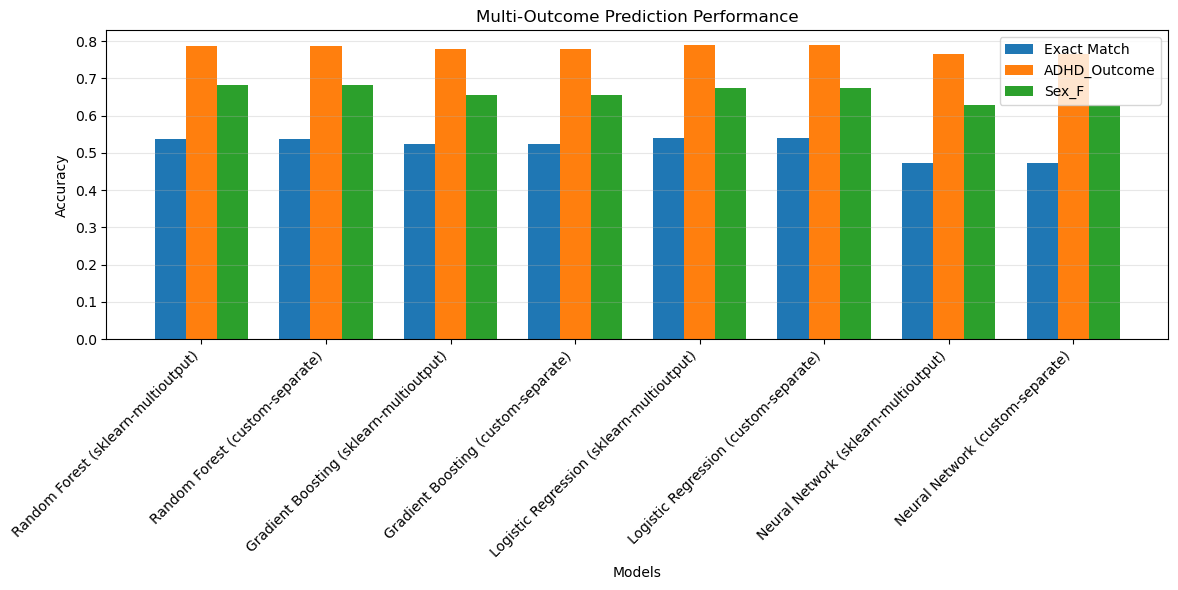

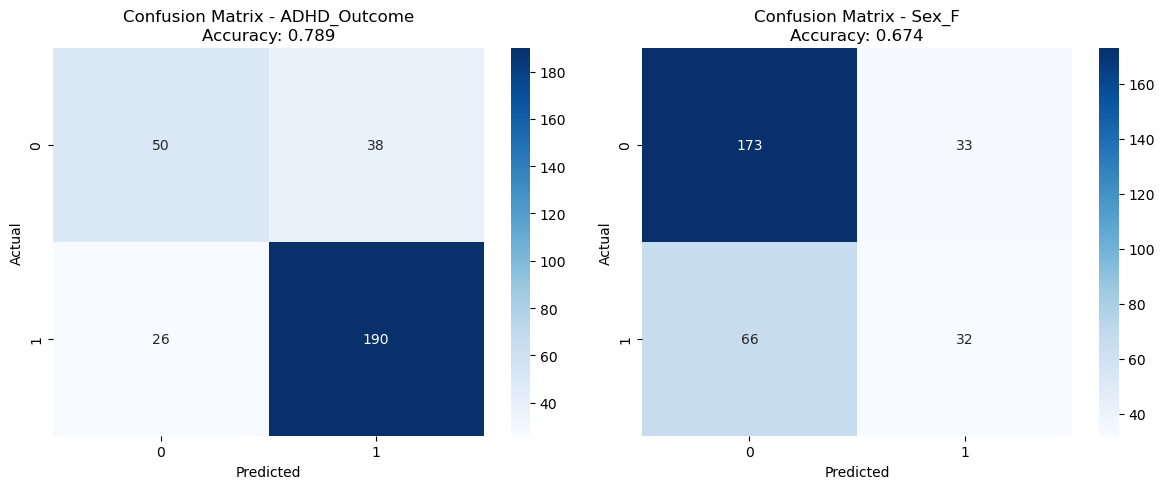

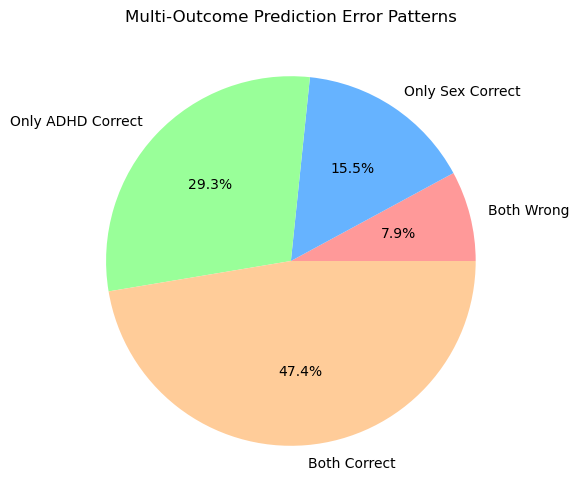


MULTI-TASK LEARNING EFFECT ANALYSIS

Features with the greatest difference in importance between single and multi-task models:
                      Feature  ADHD_Single  ADHD_Multi  ADHD_Diff  Sex_Single  \
0       SDQ_SDQ_Hyperactivity     0.162042    0.162042        0.0    0.050775   
1       SDQ_SDQ_Externalizing     0.115193    0.115193        0.0    0.058871   
2  SDQ_SDQ_Difficulties_Total     0.092085    0.092085        0.0    0.061208   
3   SDQ_SDQ_Generating_Impact     0.083808    0.083808        0.0    0.052311   
4    SDQ_SDQ_Conduct_Problems     0.035927    0.035927        0.0    0.035206   
5       SDQ_SDQ_Internalizing     0.042576    0.042576        0.0    0.052065   
6  SDQ_SDQ_Emotional_Problems     0.030632    0.030632        0.0    0.048704   
7           SDQ_SDQ_Prosocial     0.033511    0.033511        0.0    0.048013   
8       SDQ_SDQ_Peer_Problems     0.030770    0.030770        0.0    0.039495   
9     Basic_Demos_Enroll_Year     0.049134    0.049134        

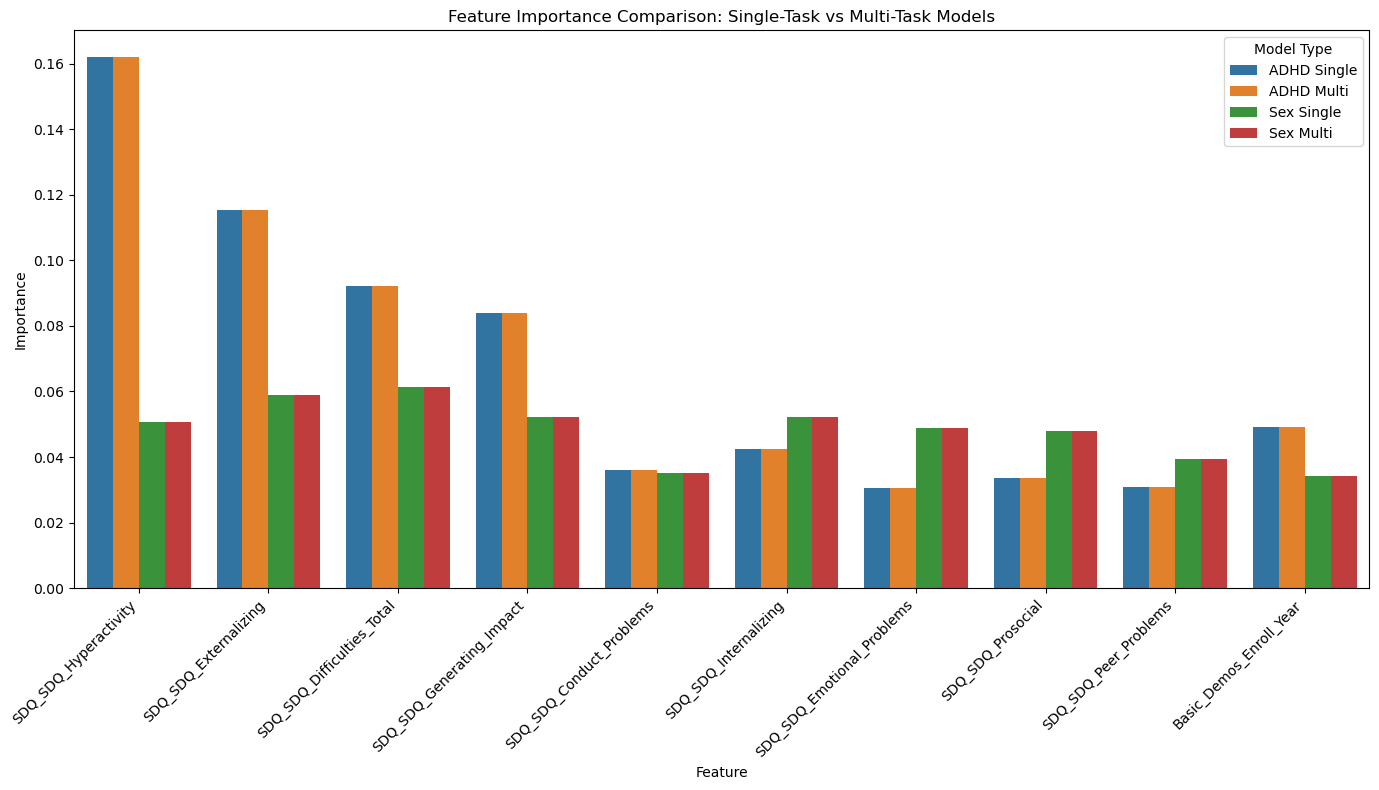


Performance Comparison:
ADHD - Single model: 0.7862, Multi-task model: 0.7862, Difference: 0.0000
Sex  - Single model: 0.6809, Multi-task model: 0.6809, Difference: 0.0000

Correlation between ADHD and Sex prediction errors:
  Multi-task model: 0.0045
  Single-task models: 0.0045

Disagreement between single and multi-task models:
  ADHD predictions differ on 0 samples (0.0%)
  Sex predictions differ on 0 samples (0.0%)

When models disagree:
  ADHD: Multi-task is correct more often: 0 times
  ADHD: Single-task is correct more often: 0 times
  Sex: Multi-task is correct more often: 0 times
  Sex: Single-task is correct more often: 0 times

Class imbalance (ratio of majority to minority class):
  ADHD: 2.45
  Sex: 2.10

Conclusion:
  Single-task models perform better than the multi-task model for both targets.


In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from itertools import product
import warnings
warnings.filterwarnings('ignore')

# Function to create a custom multi-outcome classifier
class CustomMultiOutputClassifier:
    """
    A custom implementation that trains separate models for each target
    but provides a unified interface like MultiOutputClassifier
    """
    def __init__(self, estimator):
        self.estimator = estimator
        self.estimators_ = []
        
    def fit(self, X, Y):
        self.estimators_ = []
        for y in Y.T:
            estimator = self.estimator()
            estimator.fit(X, y)
            self.estimators_.append(estimator)
        return self
    
    def predict(self, X):
        return np.column_stack([est.predict(X) for est in self.estimators_])
    
    def predict_proba(self, X):
        return [est.predict_proba(X) for est in self.estimators_]

# Function to evaluate multi-outcome models
def evaluate_multi_outcome_models(X, Y, random_state=42):
    """
    Train and evaluate multiple models for multi-outcome prediction
    """
    print("\n" + "="*70)
    print("MULTI-OUTCOME PREDICTION FOR ADHD_OUTCOME AND SEX_F")
    print("="*70)
    
    # Split data
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.25, random_state=random_state, stratify=Y if Y.shape[0] <= 1000 else None
    )
    
    print(f"Training set shape: {X_train.shape}, Test set shape: {X_test.shape}")
    
    # Prepare standard scaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Define models to evaluate
    base_models = {
        'Random Forest': lambda: RandomForestClassifier(n_estimators=100, random_state=random_state),
        'Gradient Boosting': lambda: GradientBoostingClassifier(random_state=random_state),
        'Logistic Regression': lambda: LogisticRegression(max_iter=1000, random_state=random_state),
        'Neural Network': lambda: MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=random_state),
    }
    
    # Define multi-output strategies
    strategies = {
        'sklearn-multioutput': lambda estimator: MultiOutputClassifier(estimator()),
        'custom-separate': lambda estimator: CustomMultiOutputClassifier(estimator)
    }
    
    # Store results
    results = {}
    
    # Track the best model
    best_accuracy = 0
    best_model_name = None
    
    # Evaluate all combinations
    for model_name, model_factory in base_models.items():
        for strategy_name, strategy_factory in strategies.items():
            full_model_name = f"{model_name} ({strategy_name})"
            print(f"\nEvaluating {full_model_name}...")
            
            try:
                # Create and train the model
                model = strategy_factory(model_factory)
                model.fit(X_train_scaled, Y_train)
                
                # Make predictions
                Y_pred = model.predict(X_test_scaled)
                
                # Calculate overall accuracy (both targets correct)
                exact_match_accuracy = np.mean(np.all(Y_pred == Y_test, axis=1))
                
                # Calculate per-target accuracy
                target_accuracies = []
                target_reports = []
                target_cms = []
                target_aucs = []
                
                for i, target_name in enumerate(['ADHD_Outcome', 'Sex_F']):
                    target_acc = accuracy_score(Y_test[:, i], Y_pred[:, i])
                    target_accuracies.append(target_acc)
                    
                    # Get classification report
                    target_report = classification_report(Y_test[:, i], Y_pred[:, i], output_dict=True)
                    target_reports.append(target_report)
                    
                    # Get confusion matrix
                    target_cm = confusion_matrix(Y_test[:, i], Y_pred[:, i])
                    target_cms.append(target_cm)
                    
                    # Try to get AUC score if the model supports predict_proba
                    try:
                        if hasattr(model, 'predict_proba'):
                            y_proba = model.predict_proba(X_test_scaled)
                            # Handle different return formats
                            if isinstance(y_proba, list):
                                target_prob = y_proba[i][:, 1]
                            else:
                                target_prob = y_proba[:, i, 1]
                            target_auc = roc_auc_score(Y_test[:, i], target_prob)
                        else:
                            target_auc = np.nan
                    except:
                        target_auc = np.nan
                    
                    target_aucs.append(target_auc)
                
                # Calculate hamming loss (fraction of labels that are incorrectly predicted)
                hamming_loss = 1 - np.mean(Y_pred == Y_test)
                
                # Store results
                results[full_model_name] = {
                    'exact_match_accuracy': exact_match_accuracy,
                    'target_accuracies': target_accuracies,
                    'target_reports': target_reports,
                    'target_cms': target_cms,
                    'target_aucs': target_aucs,
                    'hamming_loss': hamming_loss
                }
                
                # Check if this is the best model so far
                if exact_match_accuracy > best_accuracy:
                    best_accuracy = exact_match_accuracy
                    best_model_name = full_model_name
                
                # Print results
                print(f"  Exact Match Accuracy: {exact_match_accuracy:.4f}")
                print(f"  ADHD_Outcome Accuracy: {target_accuracies[0]:.4f}")
                print(f"  Sex_F Accuracy: {target_accuracies[1]:.4f}")
                print(f"  ADHD_Outcome AUC: {target_aucs[0]:.4f}" if not np.isnan(target_aucs[0]) else "  ADHD_Outcome AUC: N/A")
                print(f"  Sex_F AUC: {target_aucs[1]:.4f}" if not np.isnan(target_aucs[1]) else "  Sex_F AUC: N/A")
                print(f"  Hamming Loss: {hamming_loss:.4f}")
                
            except Exception as e:
                print(f"  Error evaluating {full_model_name}: {e}")
    
    # Detailed analysis of the best model
    if best_model_name:
        print("\n" + "="*50)
        print(f"DETAILED ANALYSIS OF BEST MODEL: {best_model_name}")
        print("="*50)
        
        best_result = results[best_model_name]
        
        # Print classification reports
        for i, target_name in enumerate(['ADHD_Outcome', 'Sex_F']):
            print(f"\nClassification Report for {target_name}:")
            report = best_result['target_reports'][i]
            print(f"Precision - Class 0: {report['0']['precision']:.4f}, Class 1: {report['1']['precision']:.4f}")
            print(f"Recall    - Class 0: {report['0']['recall']:.4f}, Class 1: {report['1']['recall']:.4f}")
            print(f"F1-score  - Class 0: {report['0']['f1-score']:.4f}, Class 1: {report['1']['f1-score']:.4f}")
            print(f"Support   - Class 0: {report['0']['support']}, Class 1: {report['1']['support']}")
        
        # Analyze error patterns
        print("\nError Pattern Analysis:")
        Y_best_pred = model.predict(X_test_scaled)
        
        # Create a 2x2 matrix of prediction patterns
        error_patterns = np.zeros((2, 2))
        for i in range(len(Y_test)):
            adhd_correct = Y_test[i, 0] == Y_best_pred[i, 0]
            sex_correct = Y_test[i, 1] == Y_best_pred[i, 1]
            error_patterns[int(adhd_correct), int(sex_correct)] += 1
        
        print(f"  Both predictions correct: {error_patterns[1, 1]} samples ({error_patterns[1, 1]/len(Y_test):.1%})")
        print(f"  Only ADHD prediction correct: {error_patterns[1, 0]} samples ({error_patterns[1, 0]/len(Y_test):.1%})")
        print(f"  Only Sex prediction correct: {error_patterns[0, 1]} samples ({error_patterns[0, 1]/len(Y_test):.1%})")
        print(f"  Both predictions wrong: {error_patterns[0, 0]} samples ({error_patterns[0, 0]/len(Y_test):.1%})")
        
        # Check correlations between predictions
        corr = np.corrcoef(Y_best_pred.T)[0, 1]
        print(f"\nCorrelation between ADHD and Sex predictions: {corr:.4f}")
        
        actual_corr = np.corrcoef(Y_test.T)[0, 1]
        print(f"Actual correlation between ADHD and Sex in test data: {actual_corr:.4f}")
        
        # Compare with single-target models
        print("\nComparison with Single-Target Models:")
        
        # Train individual models for comparison
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        for i, target_name in enumerate(['ADHD_Outcome', 'Sex_F']):
            # Extract base model from best model name
            base_model_name = best_model_name.split(' (')[0]
            model_factory = base_models[base_model_name]
            
            # Train single target model
            single_model = model_factory()
            single_model.fit(X_train_scaled, Y_train[:, i])
            
            # Evaluate
            single_pred = single_model.predict(X_test_scaled)
            single_acc = accuracy_score(Y_test[:, i], single_pred)
            
            multi_acc = best_result['target_accuracies'][i]
            
            print(f"  {target_name} - Single model: {single_acc:.4f}, Multi-outcome model: {multi_acc:.4f}, " + 
                  f"Difference: {(multi_acc - single_acc):.4f}")
    
    # Visualize results
    # 1. Overall comparison of models
    plt.figure(figsize=(12, 6))
    model_names = list(results.keys())
    exact_match_accuracies = [results[model]['exact_match_accuracy'] for model in model_names]
    adhd_accuracies = [results[model]['target_accuracies'][0] for model in model_names]
    sex_accuracies = [results[model]['target_accuracies'][1] for model in model_names]
    
    x = np.arange(len(model_names))
    width = 0.25
    
    plt.bar(x - width, exact_match_accuracies, width, label='Exact Match')
    plt.bar(x, adhd_accuracies, width, label='ADHD_Outcome')
    plt.bar(x + width, sex_accuracies, width, label='Sex_F')
    
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Multi-Outcome Prediction Performance')
    plt.xticks(x, model_names, rotation=45, ha='right')
    plt.legend()
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # 2. Confusion matrices for best model
    if best_model_name:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        for i, (ax, target_name) in enumerate(zip(axes, ['ADHD_Outcome', 'Sex_F'])):
            cm = best_result['target_cms'][i]
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                      xticklabels=['0', '1'], yticklabels=['0', '1'])
            ax.set_xlabel('Predicted')
            ax.set_ylabel('Actual')
            ax.set_title(f'Confusion Matrix - {target_name}\nAccuracy: {best_result["target_accuracies"][i]:.3f}')
        
        plt.tight_layout()
        plt.show()
        
        # 3. Error pattern visualization
        plt.figure(figsize=(8, 6))
        error_pattern_labels = ['Both Wrong', 'Only Sex Correct', 'Only ADHD Correct', 'Both Correct']
        error_pattern_values = [
            error_patterns[0, 0],  # Both wrong
            error_patterns[0, 1],  # Only Sex correct
            error_patterns[1, 0],  # Only ADHD correct
            error_patterns[1, 1]   # Both correct
        ]
        
        plt.pie(error_pattern_values, labels=error_pattern_labels, autopct='%1.1f%%',
                colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
        plt.title('Multi-Outcome Prediction Error Patterns')
        plt.show()
    
    # Return the best model name and its performance
    return best_model_name, results[best_model_name] if best_model_name else None

# Function to analyze multi-task learning effect
def analyze_multi_task_effect(X, Y, random_state=42):
    """
    Analyze how multi-task learning affects feature importance and model behavior
    """
    print("\n" + "="*70)
    print("MULTI-TASK LEARNING EFFECT ANALYSIS")
    print("="*70)
    
    # We'll use Random Forest for this analysis as it provides feature importance
    # Split data
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y, test_size=0.25, random_state=random_state, stratify=Y if Y.shape[0] <= 1000 else None
    )
    
    # Prepare standard scaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Create multi-output model
    multi_model = MultiOutputClassifier(RandomForestClassifier(n_estimators=100, random_state=random_state))
    multi_model.fit(X_train_scaled, Y_train)
    
    # Create individual models
    single_models = []
    for i in range(Y_train.shape[1]):
        model = RandomForestClassifier(n_estimators=100, random_state=random_state)
        model.fit(X_train_scaled, Y_train[:, i])
        single_models.append(model)
    
    # Compare feature importances
    feature_names = X.columns
    
    # Get feature importances from individual models
    single_importances = []
    for i, model in enumerate(single_models):
        importances = model.feature_importances_
        single_importances.append(importances)
    
    # Get feature importances from multi-output model
    multi_importances = []
    for estimator in multi_model.estimators_:
        importances = estimator.feature_importances_
        multi_importances.append(importances)
    
    # Create a DataFrame to compare importances
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'ADHD_Single': single_importances[0],
        'ADHD_Multi': multi_importances[0],
        'Sex_Single': single_importances[1],
        'Sex_Multi': multi_importances[1]
    })
    
    # Calculate differences
    importance_df['ADHD_Diff'] = importance_df['ADHD_Multi'] - importance_df['ADHD_Single']
    importance_df['Sex_Diff'] = importance_df['Sex_Multi'] - importance_df['Sex_Single']
    
    # Sort by average difference
    importance_df['Avg_Diff_Abs'] = (abs(importance_df['ADHD_Diff']) + abs(importance_df['Sex_Diff'])) / 2
    importance_df = importance_df.sort_values('Avg_Diff_Abs', ascending=False)
    
    print("\nFeatures with the greatest difference in importance between single and multi-task models:")
    print(importance_df[['Feature', 'ADHD_Single', 'ADHD_Multi', 'ADHD_Diff', 
                        'Sex_Single', 'Sex_Multi', 'Sex_Diff']].head(10))
    
    # Visualize top features with differences
    top_diff_features = importance_df.head(10)['Feature'].tolist()
    
    # Prepare data for visualization
    plot_data = []
    for feature in top_diff_features:
        feature_row = importance_df[importance_df['Feature'] == feature].iloc[0]
        plot_data.extend([
            {'Feature': feature, 'Model': 'ADHD Single', 'Importance': feature_row['ADHD_Single']},
            {'Feature': feature, 'Model': 'ADHD Multi', 'Importance': feature_row['ADHD_Multi']},
            {'Feature': feature, 'Model': 'Sex Single', 'Importance': feature_row['Sex_Single']},
            {'Feature': feature, 'Model': 'Sex Multi', 'Importance': feature_row['Sex_Multi']}
        ])
    
    plot_df = pd.DataFrame(plot_data)
    
    plt.figure(figsize=(14, 8))
    sns.barplot(x='Feature', y='Importance', hue='Model', data=plot_df)
    plt.title('Feature Importance Comparison: Single-Task vs Multi-Task Models')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Model Type')
    plt.tight_layout()
    plt.show()
    
    # Compare performance
    print("\nPerformance Comparison:")
    
    # Multi-model performance
    y_multi_pred = multi_model.predict(X_test_scaled)
    multi_accs = [accuracy_score(Y_test[:, i], y_multi_pred[:, i]) for i in range(Y_test.shape[1])]
    
    # Single-model performance
    single_preds = [model.predict(X_test_scaled) for model in single_models]
    single_accs = [accuracy_score(Y_test[:, i], single_preds[i]) for i in range(Y_test.shape[1])]
    
    print(f"ADHD - Single model: {single_accs[0]:.4f}, Multi-task model: {multi_accs[0]:.4f}, " + 
          f"Difference: {(multi_accs[0] - single_accs[0]):.4f}")
    print(f"Sex  - Single model: {single_accs[1]:.4f}, Multi-task model: {multi_accs[1]:.4f}, " + 
          f"Difference: {(multi_accs[1] - single_accs[1]):.4f}")
    
    # Analyze prediction patterns
    # Check if multi-task model makes correlated errors
    adhd_errors_multi = Y_test[:, 0] != y_multi_pred[:, 0]
    sex_errors_multi = Y_test[:, 1] != y_multi_pred[:, 1]
    
    adhd_errors_single = Y_test[:, 0] != single_preds[0]
    sex_errors_single = Y_test[:, 1] != single_preds[1]
    
    # Calculate phi coefficient (correlation between errors)
    from sklearn.metrics import matthews_corrcoef
    
    multi_error_corr = matthews_corrcoef(adhd_errors_multi, sex_errors_multi)
    single_error_corr = matthews_corrcoef(adhd_errors_single, sex_errors_single)
    
    print(f"\nCorrelation between ADHD and Sex prediction errors:")
    print(f"  Multi-task model: {multi_error_corr:.4f}")
    print(f"  Single-task models: {single_error_corr:.4f}")
    
    # Calculate disagreement between models
    adhd_disagreement = y_multi_pred[:, 0] != single_preds[0]
    sex_disagreement = y_multi_pred[:, 1] != single_preds[1]
    
    print(f"\nDisagreement between single and multi-task models:")
    print(f"  ADHD predictions differ on {sum(adhd_disagreement)} samples ({sum(adhd_disagreement)/len(adhd_disagreement):.1%})")
    print(f"  Sex predictions differ on {sum(sex_disagreement)} samples ({sum(sex_disagreement)/len(sex_disagreement):.1%})")
    
    # Analyze samples where predictions differ
    adhd_better_in_multi = (y_multi_pred[:, 0] == Y_test[:, 0]) & (single_preds[0] != Y_test[:, 0])
    adhd_worse_in_multi = (y_multi_pred[:, 0] != Y_test[:, 0]) & (single_preds[0] == Y_test[:, 0])
    
    sex_better_in_multi = (y_multi_pred[:, 1] == Y_test[:, 1]) & (single_preds[1] != Y_test[:, 1])
    sex_worse_in_multi = (y_multi_pred[:, 1] != Y_test[:, 1]) & (single_preds[1] == Y_test[:, 1])
    
    print(f"\nWhen models disagree:")
    print(f"  ADHD: Multi-task is correct more often: {sum(adhd_better_in_multi)} times")
    print(f"  ADHD: Single-task is correct more often: {sum(adhd_worse_in_multi)} times")
    print(f"  Sex: Multi-task is correct more often: {sum(sex_better_in_multi)} times")
    print(f"  Sex: Single-task is correct more often: {sum(sex_worse_in_multi)} times")
    
    # Find conditions where multi-task learning helps
    adhd_value_counts = np.bincount(Y_test[:, 0])
    sex_value_counts = np.bincount(Y_test[:, 1])
    
    # Check for class imbalance
    adhd_imbalance = max(adhd_value_counts) / min(adhd_value_counts)
    sex_imbalance = max(sex_value_counts) / min(sex_value_counts)
    
    print(f"\nClass imbalance (ratio of majority to minority class):")
    print(f"  ADHD: {adhd_imbalance:.2f}")
    print(f"  Sex: {sex_imbalance:.2f}")
    
    print("\nConclusion:")
    if multi_accs[0] > single_accs[0] and multi_accs[1] > single_accs[1]:
        print("  Multi-task learning improves performance for both ADHD and Sex prediction.")
    elif multi_accs[0] > single_accs[0]:
        print("  Multi-task learning improves performance for ADHD prediction but not Sex prediction.")
    elif multi_accs[1] > single_accs[1]:
        print("  Multi-task learning improves performance for Sex prediction but not ADHD prediction.")
    else:
        print("  Single-task models perform better than the multi-task model for both targets.")
    
    # Return the analysis results
    return {
        'importance_df': importance_df,
        'multi_accs': multi_accs,
        'single_accs': single_accs,
        'error_correlations': (multi_error_corr, single_error_corr)
    }

# Main function
def main():
    # Load the data
    try:
        # Try to load the dataset if available
        selected_df = pd.read_csv('selected_features_dual_target.csv')
        print("Using the filtered features dataset.")
    except:
        try:
            # Try to use the original dataset
            selected_df = train_df_50
            print("Using the original dataset.")
        except NameError:
            print("Dataset not found. Creating a synthetic dataset for demonstration.")
            # Create a synthetic dataset
            from sklearn.datasets import make_classification
            X_synth, y_adhd = make_classification(
                n_samples=1000, n_features=20, n_informative=10, 
                n_redundant=5, n_clusters_per_class=2, random_state=42
            )
            # Create a second target
            _, y_sex = make_classification(
                n_samples=1000, n_features=20, n_informative=10,
                n_redundant=5, n_clusters_per_class=2, random_state=43
            )
            
            feature_names = [f'feature_{i+1}' for i in range(20)]
            selected_df = pd.DataFrame(X_synth, columns=feature_names)
            selected_df['ADHD_Outcome'] = y_adhd
            selected_df['Sex_F'] = y_sex
    
    print(f"Dataset shape: {selected_df.shape}")
    
    # Extract features and targets
    target_columns = ["ADHD_Outcome", "Sex_F"]
    feature_columns = [col for col in selected_df.columns if col not in target_columns]
    
    X = selected_df[feature_columns]
    
    # Convert target columns to array
    Y = selected_df[target_columns].values
    
    # Check for missing values
    missing_values = X.isnull().sum().sum()
    if missing_values > 0:
        print(f"Warning: Dataset contains {missing_values} missing values. Filling with mean values.")
        X = X.fillna(X.mean())
    
    # Evaluate multi-outcome models
    best_model_name, best_model_perf = evaluate_multi_outcome_models(X, Y)
    
    # Analyze multi-task learning effect
    analysis_results = analyze_multi_task_effect(X, Y)

if __name__ == "__main__":
    main()

In [107]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import StandardScaler

def create_and_save_predictions(output_filename='submission.csv'):
    """
    Create predictions on test data and save them to a CSV file
    """
    try:
        # Try to load the train dataset
        try:
            # First try to load the selected features dataset
            train_df = pd.read_csv('selected_features_dual_target.csv')
            print("Using the filtered features dataset for training.")
        except:
            # If not available, use the original dataset
            train_df = pd.read_csv('train_df_50.csv')
            print("Using the original dataset for training.")
        
        print(f"Training data shape: {train_df.shape}")

        print(f"Test data shape: {test_df.shape}")
        print("Test data preview:")
        print(test_df.head())
        
        # Extract columns
        target_columns = ["ADHD_Outcome", "Sex_F"]
        feature_columns = [col for col in train_df.columns if col not in target_columns]
        
        # Make sure test data has all needed feature columns
        missing_columns = [col for col in feature_columns if col not in test_df.columns]
        if missing_columns:
            print(f"Warning: Test data is missing these columns: {missing_columns}")
            feature_columns = [col for col in feature_columns if col not in missing_columns]
        
        # Prepare the data
        X_train = train_df[feature_columns]
        y_train = train_df[target_columns].values
        X_test = test_df[feature_columns]
        
        # Handle missing values
        if X_train.isnull().sum().sum() > 0:
            print("Filling missing values in training data...")
            X_train = X_train.fillna(X_train.mean())
        
        if X_test.isnull().sum().sum() > 0:
            print("Filling missing values in test data...")
            X_test = X_test.fillna(X_test.mean())
        
        # Standardize features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Train a multi-output random forest classifier
        print("Training Random Forest for multi-output prediction...")
        model = MultiOutputClassifier(
            RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
        )
        model.fit(X_train_scaled, y_train)
        
        # Make predictions on test data
        print("Making predictions on test data...")
        predictions = model.predict(X_test_scaled)
        
        # Ensure participant_id is available
        if 'participant_id' not in test_df.columns:
            print("Warning: participant_id column not found in test data. Using row index as ID.")
            participant_ids = np.arange(1, len(test_df) + 1)
        else:
            participant_ids = test_df['participant_id'].values
        
        # Create a DataFrame for submission
        submission_df = pd.DataFrame({
            'participant_id': participant_ids,
            'ADHD_Outcome': predictions[:, 0],
            'Sex_F': predictions[:, 1]
        })
        
        # Save to CSV
        submission_df.to_csv(output_filename, index=False)
        print(f"Submission file created and saved as: {output_filename}")
        print("First 5 rows of the submission file:")
        print(submission_df.head())
        
        return submission_df
    
    except Exception as e:
        print(f"Error: {e}")
        return None

# Execute the function to create and save predictions
create_and_save_predictions()

Using the filtered features dataset for training.
Training data shape: (1213, 17)
Test data shape: (304, 19928)
Test data preview:
  participant_id  EHQ_EHQ_Total  ColorVision_CV_Score  APQ_P_APQ_P_CP  \
0   Cfwaf5FX7jWK          60.03                  14.0             5.0   
1   vhGrzmvA3Hjq          86.71                  12.0             3.0   
2   ULliyEXjy4OV          26.68                  13.0             3.0   
3   LZfeAb1xMtql          93.38                  13.0             3.0   
4   EnFOUv0YK1RG         -93.38                  14.0             3.0   

   APQ_P_APQ_P_ID  APQ_P_APQ_P_INV  APQ_P_APQ_P_OPD  APQ_P_APQ_P_PM  \
0            16.0             41.0             19.0            11.0   
1            13.0             43.0             18.0            15.0   
2            14.0             36.0             16.0            14.0   
3            19.0             41.0             17.0            18.0   
4            13.0             42.0             19.0            16.0   

   

,participant_id,ADHD_Outcome,Sex_F
0,Cfwaf5FX7jWK,1,1
1,vhGrzmvA3Hjq,1,0
2,ULliyEXjy4OV,1,0
3,LZfeAb1xMtql,1,0
4,EnFOUv0YK1RG,1,0
...,...,...,...
299,UadZfjdEg7eG,1,0
300,IUEHiLmQAqCi,1,1
301,cRySmCadYFRO,1,0
302,E3MvDUtJadc5,1,0
